# Описание данных 
Датасет содержит информацию о продаже билетов авиакомпании. Каждая строка - уникальная покупка <br>
`ISSUE_DATE` – дата покупки <br>
`FLIGHT_DATE_LOC` – дата совершения перелета <br>
`PAX_TYPE` – тип пассажиров <br>
`REVENUE_AMOUNT` – сумма (значения скорректированы, но пропорции сохранены) <br>
`ORIG_CITY_CODE` – город отправления <br>
`DEST_CITY_CODE` – город назначения <br>
`ROUTE_FLIGHT_TYPE` – тип перелета <br>
`FFP_FLAG` – наличие программы лояльности <br>
`SALE_TYPE` – способ покупки <br>

### Расшифровка значений в полях: 
**PAX_TYPE** <br>
`AD` – ADULT <br>
`CHD` – CHILD <br>
`INF` – UNDEFINED <br>
<br>
**ROUTE_FLIGHT_TYPE** <br>
`ВВЛ` – Внутренние Воздушные Линии <br>
`МВЛ` – Международные Воздушные Линии

### Дополнительная информация:
**Данные по кодам аэропортов** <br>
https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat  <br>
**Список полей:** <br>
column_names = ['Airport Name', 'Location', 'Country', 'IATA_Code', 'ICAO_Code', 'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST', 'Timezone Region', 'Type', 'Source']

### Оглавление
Нажмите на ссылку, чтобы перейти к нужному разделу <br><br>
1. [Познакомьтесь с данными](#section_id) <br>
2. [Осуществите предобработку данных](#section2) <br>
    - 2.1 [Приведите заголовки к удобному виду](#section3)<br>
    - 2.2 [Проверьте типы данных](#section4)<br>
    - 2.3 [Обработайте пропуски](#section5)<br>
    - 2.4 [Проверьте наличие дубликатов](#section6)<br>
    - 2.5 [Исключите нулевые значения в выручке для дальнейшего исследования](#section7)<br>
3. [Исследовательский анализ данных:](#section8)<br>
     - 3.1 [Создайте отчет о динамике продаж (выручке). Постройте линейный график. Повторите отчет с детализацией по полям: FFP_FLAG, ROUTE_FLIGHT_TYPE, SALE_TYPE. Постройте общие отчеты по выручке по типам пассажиров, по типам перелета, по способам покупки, по программам лояльности. Визуализируйте каждый отчет. Решение о детализации отчетов примите самостоятельно](#section9)<br>
     - 3.2 [Исследуйте выручку, примите решение об исключении выбросов для дальнейшего исследования, руководствуясь минимизацией потерь в данных](#section10)<br>
     - 3.3 [Исследуйте сезонность продаж. Дополнительно проверьте гипотезу о том, что выручка от продаж осенью и зимой отличается. Исследуйте выручку и число продаж по месяцам, проверьте корреляцию](#section11)<br>
     - 3.4 [Клиенты покупают билеты в разное время. Кто-то покупает билеты заранее, другие - в последний момент. Проверьте гипотезу о том, что выручка от продажи билетов для этих двух групп клиентов отличается. Предварительно разбейте клиентов минимум на три группы](#section12)<br>
     - 3.5  [Определите топ-10 популярных направлений перелета (город-город) отдельно для ВМЛ и МВЛ. Изучите выручку для этих направлений. Для этого добавьте в датасет сведения о городах, используя данные из датасета](#section13)<br> 
     - 3.6 [Определите есть ли зависимость выручки от других признаков. Постройте матрицу корреляций](#section14)<br>

Каждый пункт исследования сопроводите выводами.

Датасет для пункта 3.6: <br>
https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat

In [6]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import t, norm
from scipy import stats as st
from tqdm import tqdm

In [7]:
pd.set_option('display.max_columns', None) #показывает все столбцы
pd.set_option('display.max_rows', None) #показывает все строки (если нужно для больших наборов данных)
pd.set_option('display.max_colwidth', None) #показывает все символы в строках

<a id='section_id'></a>
## 1. Познакомьтесь с данными

In [9]:
columns = ['airport_id', 'name', 'city', 'country', 'IATA', 'ICAO','latitude', 'longitude', 'altitude',
          'timezone', 'DST', 'tz_database_timezone', 'type', 'source']

data = pd.read_csv('air_data.csv', sep=';')
df_36 = pd.read_csv('airports.dat.csv', names = columns, index_col = 'airport_id')
data.head()

,ISSUE_DATE,FLIGHT_DATE_LOC,PAX_TYPE,REVENUE_AMOUNT,ORIG_CITY_CODE,DEST_CITY_CODE,ROUTE_FLIGHT_TYPE,FFP_FLAG,SALE_TYPE
0,2021-12-07 00:00:00,2022-01-11 00:00:00,AD,200,MOW,KGD,ВВЛ,NaN,ONLINE
1,2021-12-31 00:00:00,2022-01-03 00:00:00,AD,610,UUS,OVB,ВВЛ,NaN,OFFLINE
2,2021-11-28 00:00:00,2022-01-04 00:00:00,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE
3,2021-12-08 00:00:00,2022-01-05 00:00:00,AD,190,VOZ,MOW,ВВЛ,NaN,ONLINE
4,2021-12-08 00:00:00,2022-01-12 00:00:00,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE


In [10]:
df_36.head()

,name,city,country,IATA,ICAO,latitude,longitude,altitude,timezone,DST,tz_database_timezone,type,source
airport_id,,,,,,,,,,,,,
1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


*Посмотрим общую информацию о датасетах*

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ISSUE_DATE         50000 non-null  object
 1   FLIGHT_DATE_LOC    50000 non-null  object
 2   PAX_TYPE           50000 non-null  object
 3   REVENUE_AMOUNT     50000 non-null  int64 
 4   ORIG_CITY_CODE     49998 non-null  object
 5   DEST_CITY_CODE     49999 non-null  object
 6   ROUTE_FLIGHT_TYPE  50000 non-null  object
 7   FFP_FLAG           19398 non-null  object
 8   SALE_TYPE          50000 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.4+ MB


**Датасет `data`:** <br>
- В датасете `data` общее количество строк - 50000
- Количество столбцов - 9
- В нескольких столбцах присутствуют пропуски, которые в дальнейшем будет необходимо обработать
- Типы данных: 8 столбцов типа object (строковые значения) и 1 столбец типа int64 (числовые данные)

In [14]:
df_36.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7698 entries, 1 to 14110
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  7698 non-null   object 
 1   city                  7649 non-null   object 
 2   country               7698 non-null   object 
 3   IATA                  7698 non-null   object 
 4   ICAO                  7698 non-null   object 
 5   latitude              7698 non-null   float64
 6   longitude             7698 non-null   float64
 7   altitude              7698 non-null   int64  
 8   timezone              7698 non-null   object 
 9   DST                   7698 non-null   object 
 10  tz_database_timezone  7698 non-null   object 
 11  type                  7698 non-null   object 
 12  source                7698 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 842.0+ KB


**Датасет `df_36`:** <br>
- В датасете `df_36` общее количество строк - 7698
- Количество столбцов - 13
- В нескольких столбцах присутствуют пропуски, которые в дальнейшем будет необходимо обработать
- Типы данных: все столбцы типа object (строковые значения)

### Вывод по пункту "1. Познакомьтесь с данными"
В ходе анализа были загружены файлы, преобразован один из датасетов в нужный вид и изучена следующая информация: <br>
**Датасет `data`:**
- В датасете `data` общее количество строк - 50000
- Количество столбцов - 9
- В нескольких столбцах присутствуют пропуски, которые в дальнейшем будет необходимо обработать
- Типы данных: 8 столбцов типа object (строковые значения) и 1 столбец типа int64 (числовые данные)

 **Датасет `df_36`:**
- В датасете `df_36` общее количество строк - 7698
- Количество столбцов - 13
- В нескольких столбцах присутствуют пропуски, которые в дальнейшем будет необходимо обработать
- Типы данных: все столбцы типа object (строковые значения)

<a id='section2'></a>
## 2. Осуществите предобработку данных

<a id='section3'></a>
### 2.1 Приведите заголовки к удобному виду

Чтобы привести заголовки к нужному виду, выполним следующие действия: <br>
- Уберем лишние пробелы и специальные символы до и после названия столбца
- Преобразуем все заголовки в нижний регистр
- Если в заголовках присутствуют длинные названия, разобьем их с помощью нижних подчеркиваний для более удобного восприятия

In [20]:
data.head(1)

,ISSUE_DATE,FLIGHT_DATE_LOC,PAX_TYPE,REVENUE_AMOUNT,ORIG_CITY_CODE,DEST_CITY_CODE,ROUTE_FLIGHT_TYPE,FFP_FLAG,SALE_TYPE
0,2021-12-07 00:00:00,2022-01-11 00:00:00,AD,200,MOW,KGD,ВВЛ,NaN,ONLINE


In [21]:
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

In [22]:
df_36.head(1)

,name,city,country,IATA,ICAO,latitude,longitude,altitude,timezone,DST,tz_database_timezone,type,source
airport_id,,,,,,,,,,,,,
1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.08169,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports


In [23]:
df_36.columns = df_36.columns.str.strip().str.lower().str.replace(' ', '_')

In [24]:
display(data.head(1))
df_36.head(1)

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
0,2021-12-07 00:00:00,2022-01-11 00:00:00,AD,200,MOW,KGD,ВВЛ,NaN,ONLINE


,name,city,country,iata,icao,latitude,longitude,altitude,timezone,dst,tz_database_timezone,type,source
airport_id,,,,,,,,,,,,,
1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.08169,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports


#### Вывод по пункту "2.1 Приведите заголовки к удобному виду"
В ходе данного пункта заголовки были приведены к нужному и правильному виду:
- Убраны лишние пробелы и специальные символы до и после названия столбца
- Преобразованы все заголовки в нижний регистр
- Если в заголовках присутствовали длинные названия, мы разбили их с помощью нижних подчеркиваний для более удобного восприятия

<a id='section4'></a>
### 2.2 Проверьте типы данных

*Рассмотрим сначала датасет `data`*

In [28]:
data.dtypes

issue_date           object
flight_date_loc      object
pax_type             object
revenue_amount        int64
orig_city_code       object
dest_city_code       object
route_flight_type    object
ffp_flag             object
sale_type            object
dtype: object

In [29]:
data.head(1)

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
0,2021-12-07 00:00:00,2022-01-11 00:00:00,AD,200,MOW,KGD,ВВЛ,NaN,ONLINE


*Изменим тип данных столбца `issue_date` (дата покупки) на datetime*

In [31]:
data['issue_date'] = pd.to_datetime(data['issue_date'])

*Изменим тип данных столбца `flight_date_loc` (дата совершения перелета) на datetime*

In [33]:
data['flight_date_loc'] = pd.to_datetime(data['flight_date_loc'])

In [34]:
data.dtypes #проверка

issue_date           datetime64[ns]
flight_date_loc      datetime64[ns]
pax_type                     object
revenue_amount                int64
orig_city_code               object
dest_city_code               object
route_flight_type            object
ffp_flag                     object
sale_type                    object
dtype: object

<br>*Рассмотрим датасет `df_36`*

In [36]:
df_36.dtypes

name                     object
city                     object
country                  object
iata                     object
icao                     object
latitude                float64
longitude               float64
altitude                  int64
timezone                 object
dst                      object
tz_database_timezone     object
type                     object
source                   object
dtype: object

In [37]:
df_36.head(1)

,name,city,country,iata,icao,latitude,longitude,altitude,timezone,dst,tz_database_timezone,type,source
airport_id,,,,,,,,,,,,,
1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.08169,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports


**Обозначим информацию, которая представлена в датасете `df_36`:**  <br>
`airport_name` – название аэропорта <br>
`location` – город или место, где расположен аэропорт <br>
`country` – страна, в которой находится аэропорт <br>
`iata_code` – трехбуквенный код аэропорта по стандарту IATA (Международная ассоциация воздушного транспорта) <br>
`icao_code` – четырехбуквенный код аэропорта по стандарту ICAO (Международная организация гражданской авиации) <br>
`latitude` – географическая широта местоположения аэропорта <br>
`longitude` – географическая долгота местоположения аэропорта <br>
`altitude` – высота аэропорта над уровнем моря (в футах) <br>
`timezone` – часовой пояс аэропорта <br>
`dst` – обозначение наличия летнего времени <br>
`timezone_region` – название часового пояса в формате "континент/город" <br>
`type` – тип объекта (например, аэропорт) <br>
`source` – источник данных об аэропорте <br>

*Преобразуем в тип с вещественными числами (числами с плавающей запятой) некоторые столбцы в датасете `df_36`*

In [40]:
df_36['latitude'] = df_36['latitude'].astype(float)
df_36['longitude'] = df_36['longitude'].astype(float)
df_36['altitude'] = df_36['altitude'].astype(float)
df_36.dtypes

name                     object
city                     object
country                  object
iata                     object
icao                     object
latitude                float64
longitude               float64
altitude                float64
timezone                 object
dst                      object
tz_database_timezone     object
type                     object
source                   object
dtype: object

#### Вывод по пункту "2.2 Проверьте типы данных"
Были проверены типы данных и преобразованы в нужный вид <br>
**Датасет `data`:**
- Изменили тип данных столбца `issue_date` (дата покупки) на datetime
- Изменили тип данных столбца `flight_date_loc` (дата совершения перелета) на datetime
<br>

**Датасет `df_36`:**
- Обозначили информацию, которая представлена в датасете `df_36`
- Преобразуем в тип с вещественными числами (числами с плавающей запятой) некоторые столбцы: `latitude`, `longitude`, `altitude`

<a id='section5'></a>
### 2.3 Обработайте пропуски

*Для начала проверим количество пропусков в каждом столбце двух датасетов*

In [44]:
data.isna().sum()

issue_date               0
flight_date_loc          0
pax_type                 0
revenue_amount           0
orig_city_code           2
dest_city_code           1
route_flight_type        0
ffp_flag             30602
sale_type                0
dtype: int64

In [45]:
data['ffp_flag'].unique()

array([nan, 'FFP'], dtype=object)

<div class="alert alert-block alert-info">
<b>Комментарий от студента:<br>
Комментарий к работе "data['ffp_flag'] лучше сразу в булев тип" был исправлен несколькими пунктами ниже
</b>
</div>

In [47]:
data['ffp_flag'] = data['ffp_flag'].replace('FFP', True).fillna(False)
data['ffp_flag'] = data['ffp_flag'].astype(bool)
data['ffp_flag'].unique()

C:\Users\HP\AppData\Local\Temp\ipykernel_13072\724569187.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['ffp_flag'] = data['ffp_flag'].replace('FFP', True).fillna(False)


array([False,  True])

In [48]:
data.sample(5)

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
436,2021-11-07,2021-11-12,AD,170,MCX,MOW,ВВЛ,False,ONLINE
15314,2022-09-13,2022-09-22,AD,310,MOW,LBD,МВЛ,False,OFFLINE
3904,2021-12-25,2022-01-13,AD,190,MOW,UFA,ВВЛ,False,ONLINE
25615,2021-11-17,2021-12-30,AD,390,TOF,MOW,ВВЛ,True,ONLINE
8461,2022-02-22,2022-03-10,AD,310,UFA,MOW,ВВЛ,True,ONLINE


In [49]:
data['ffp_flag'].dtypes

dtype('bool')

In [50]:
data.isna().sum()

issue_date           0
flight_date_loc      0
pax_type             0
revenue_amount       0
orig_city_code       2
dest_city_code       1
route_flight_type    0
ffp_flag             0
sale_type            0
dtype: int64

*Теперь проверим `df_36`*

In [52]:
df_36.isna().sum()

name                     0
city                    49
country                  0
iata                     0
icao                     0
latitude                 0
longitude                0
altitude                 0
timezone                 0
dst                      0
tz_database_timezone     0
type                     0
source                   0
dtype: int64

#### Вывод по пункту 2.3 Обработайте пропуски
**Датасет `data`:** <br>
- Мы заполнили пропуски с городами отправления и назначения как `unknown`, т.к. нам не известно это, а удалить нельзя. А в случае с программой лояльности мы заменили на значение `no`, т.к. эти пассажиры не участвуют в программе лояльности, а уникальные значения - это либо `nan`, либо `FFP`

<a id='section6'></a>
### 2.4 Проверьте наличие дубликатов

In [55]:
data.duplicated().sum() #подсчет

169

In [56]:
data = data.drop_duplicates() #удаление явных дубликатов
data.duplicated().sum()

0

In [57]:
df_36.duplicated().sum() #подсчет (явных дубликатов нет)

0

*Рассмотрим неявные дубликаты*

In [59]:
data.head(1)

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,False,ONLINE


In [60]:
data['pax_type'].unique()

array(['AD', 'CHD', 'INF'], dtype=object)

In [61]:
data['orig_city_code'].unique()

array(['MOW', 'UUS', 'KGD', 'VOZ', 'OVB', 'KZN', 'PEZ', 'UUD', 'GDZ',
       'TAS', 'SVX', 'OMS', 'LED', 'OGZ', 'AER', 'UFA', 'EGO', 'KRR',
       'KEJ', 'KUF', 'LBD', 'NUX', 'IKT', 'BOJ', 'DXB', 'KJA', 'AAQ',
       'TOF', 'LPK', 'SGC', 'AYT', 'HRG', 'VAR', 'MJZ', 'SIP', 'ROV',
       'BKK', 'MMK', 'KIV', 'PAR', 'BTK', 'KVK', 'PEE', 'RTW', 'NER',
       'NOZ', 'MCX', 'GOJ', 'NJC', 'MQF', 'SSH', 'YKS', 'BQS', 'IWA',
       'VVO', 'PKC', 'ABA', 'NOJ', 'CEK', 'HKT', 'BAK', 'VOG', 'ULY',
       'TLK', 'NSK', 'KSQ', 'KQT', 'MUC', 'FEG', 'ROM', 'ALA', 'MRV',
       'HTA', 'UGC', 'STW', 'GDX', 'OSS', 'ASF', 'KHV', 'MSQ', 'RGK',
       'TJM', 'DYR', 'IAR', 'BAX', 'ALC', 'DYU', 'SEL', 'CRZ', 'EVN',
       'HER', 'NCE', 'LCA', 'LWN', 'UKK', 'BHK', 'NYM', 'IKU', 'NMA',
       'BER', 'FRU', 'GRV', nan, 'REN', 'SKD', 'BZK', 'NVI', 'BCN', 'SLY',
       'HAJ', 'PFO', 'PUY', 'NQZ', 'NBC', 'TLV', 'HMA', 'PYJ', 'IJK',
       'KXK', 'TJU', 'DOH', 'JED', 'OHH', 'RKT', 'BAH', 'SKG', 'DUS',
       'IST', '

In [62]:
data['dest_city_code'].unique()

array(['KGD', 'OVB', 'MOW', 'KRR', 'DUS', 'PEE', 'AER', 'NJC', 'KUF',
       'UUD', 'HEL', 'LED', 'ABA', 'EVN', 'GDZ', 'KZN', 'MRV', 'SIP',
       'SKG', 'FEG', 'MQF', 'VOG', 'HKT', 'CEK', 'RTW', 'IKT', 'ULY',
       'NUX', 'TOF', 'DXB', 'YKS', 'KHV', 'UUS', 'BQS', 'SVX', 'PKC',
       'SGC', 'IJK', 'OGZ', 'AAQ', 'MMK', 'UFA', 'KJA', 'KIV', 'NOZ',
       'BAK', 'CGN', 'ROV', 'NER', 'EGO', 'KEJ', 'TLK', 'VIE', 'BAX',
       'PEZ', 'HTA', 'STW', 'GDX', 'VVO', 'AYT', 'RGK', 'VRN', 'TAS',
       'BLQ', 'TOX', 'BTK', 'NSK', 'OSS', 'GOJ', 'ASF', 'SSH', 'DYU',
       'OMS', 'VOZ', 'SEL', 'FRU', 'LBD', 'MCX', 'HAJ', 'MJZ', 'PFO',
       'HRG', 'BOJ', 'GRV', 'DYR', 'IWA', 'NOJ', 'NYM', 'NVI', 'KQT',
       'RKT', 'UGC', 'TJM', 'HMA', 'BER', 'PWQ', 'BKK', 'LPK', 'INN',
       'NMA', 'KSQ', 'LWN', 'MSQ', 'KVK', 'REN', 'IKU', 'TJU', 'BHK',
       'AUH', 'VAR', 'NQZ', 'ATH', 'ROM', 'LCA', 'TLV', 'UKK', 'BZK',
       'PYJ', 'PUY', 'ALC', 'DOH', 'RIX', 'KXK', 'SLY', 'PAR', 'NBC',
       'SKD', 'MUC',

In [63]:
data = data.dropna()
data.isna().sum()

issue_date           0
flight_date_loc      0
pax_type             0
revenue_amount       0
orig_city_code       0
dest_city_code       0
route_flight_type    0
ffp_flag             0
sale_type            0
dtype: int64

In [64]:
data['route_flight_type'].unique()

array(['ВВЛ', 'МВЛ'], dtype=object)

In [65]:
data['sale_type'].unique()

array(['ONLINE', 'OFFLINE'], dtype=object)

#### Вывод по пункту "2.4 Проверьте наличие дубликатов"
В датасетах были найдены удалены явные дубликаты. Неявных дубликатов не нашлось

<a id='section7'></a>
### 2.5 Исключите нулевые значения в выручке для дальнейшего исследования

In [68]:
data_old = data.shape[0]

In [69]:
data = data[data['revenue_amount'] > 0]
data['revenue_amount'].min() #проверим минимальное значение

10

In [70]:
data_new = data.shape[0]
print('Количество строк в датасете после исключения нулевых значений в выручке сократилось на {} строк'.format(data_old - data_new))

Количество строк в датасете после исключения нулевых значений в выручке сократилось на 466 строк


#### Вывод по пункту "2.5 Исключите нулевые значения в выручке для дальнейшего исследования"
Из датасета `data` были исключены нулевые значения в выручке для дальнейшего исследования, в результате чего количество строк в датасете после исключения нулевых значений в выручке сократилось на 466 

### Вывод по пункту "2. Осуществите предобработку данных"
#### Вывод по пункту "2.1 Приведите заголовки к удобному виду"
В ходе данного пункта заголовки были приведены к нужному и правильному виду:
- Убраны лишние пробелы и специальные символы до и после названия столбца
- Преобразованы все заголовки в нижний регистр
- Если в заголовках присутствовали длинные названия, мы разбили их с помощью нижних подчеркиваний для более удобного восприятия

#### Вывод по пункту "2.2 Проверьте типы данных"
Были проверены типы данных и преобразованы в нужный вид <br>
**Датасет `data`:**
- Изменили тип данных столбца `issue_date` (дата покупки) на datetime
- Изменили тип данных столбца `flight_date_loc` (дата совершения перелета) на datetime
<br>

**Датасет `df_36`:**
- Обозначили информацию, которая представлена в датасете `df_36`
- Преобразуем в тип с вещественными числами (числами с плавающей запятой) некоторые столбцы: `latitude`, `longitude`, `altitude`

#### Вывод по пункту 2.3 Обработайте пропуски
**Датасет `data`:** <br>
- Мы заполнили пропуски с городами отправления и назначения как `unknown`, т.к. нам не известно это, а удалить нельзя. А в случае с программой лояльности мы заменили на значение `no`, т.к. эти пассажиры не участвуют в программе лояльности, а уникальные значения - это либо `nan`, либо `FFP`

#### Вывод по пункту "2.4 Проверьте наличие дубликатов"
- В датасетах были найдены удалены явные дубликаты. Неявных дубликатов не нашлось

#### Вывод по пункту "2.5 Исключите нулевые значения в выручке для дальнейшего исследования"
- Из датасета `data` были исключены нулевые значения в выручке для дальнейшего исследования, в результате чего количество строк в датасете после исключения нулевых значений в выручке сократилось на 466 

<a id='section8'></a>
## 3. Исследовательский анализ данных

<a id='section9'></a>
### 3.1 Создайте отчет о динамике продаж (выручке). Постройте линейный график. Повторите отчет с детализацией по полям: FFP_FLAG, ROUTE_FLIGHT_TYPE, SALE_TYPE. Постройте общие отчеты по выручке по типам пассажиров, по типам перелета, по способам покупки, по программам лояльности. Визуализируйте каждый отчет. Решение о детализации отчетов примите самостоятельно

*Для начала создадим отчет о динамике выручки по датам и построим линейный график*

In [76]:
sales_dynamic = data.groupby(data['issue_date'].dt.to_period('M')).agg({'revenue_amount': 'sum'}) #используем разбивку по месяцам
sales_dynamic

,revenue_amount
issue_date,
2021-10,1327840
2021-11,1851260
2021-12,1757250
2022-01,1352390
2022-02,1347770
2022-03,1826430
2022-04,2032570
2022-05,1713360
2022-06,1614500


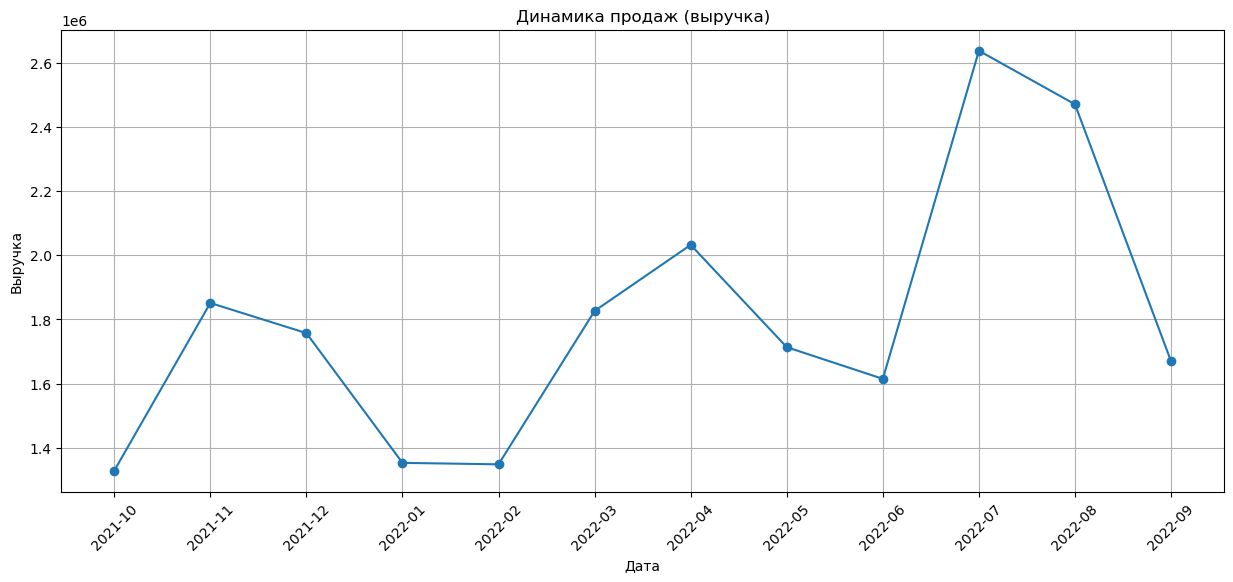

In [77]:
plt.figure(figsize=(15,6))
plt.plot(sales_dynamic.index.astype(str), sales_dynamic['revenue_amount'], marker='o')
plt.title('Динамика продаж (выручка)')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

***Вывод по отчету о динамике выручки по датам:***
- Выручка имеет заметные колебания с периодами роста и снижения. Скорее всего, это связано с сезонными колебаниями спроса на билеты, что характерно для авиаперевозок. Примерами могут быть рост выручки перед Новым годом (2021-11), весенние праздники и сильный рост после июня (объясняющий факт (один из): конец сессии, перелет студентов домой)

*Сделаем теперь с детализацией по полям: `FFP_FLAG`, `ROUTE_FLIGHT_TYPE`, `SALE_TYPE`*

In [80]:
data['issue_month'] = data['issue_date'].dt.to_period('M')


Таблица данных для: Динамика выручки по программе лояльности (FFP_FLAG) по месяцам
  issue_month  ffp_flag  revenue_amount
0     2021-10     False          825810
1     2021-10      True          502030
2     2021-11     False         1116160
3     2021-11      True          735100
4     2021-12     False         1036240


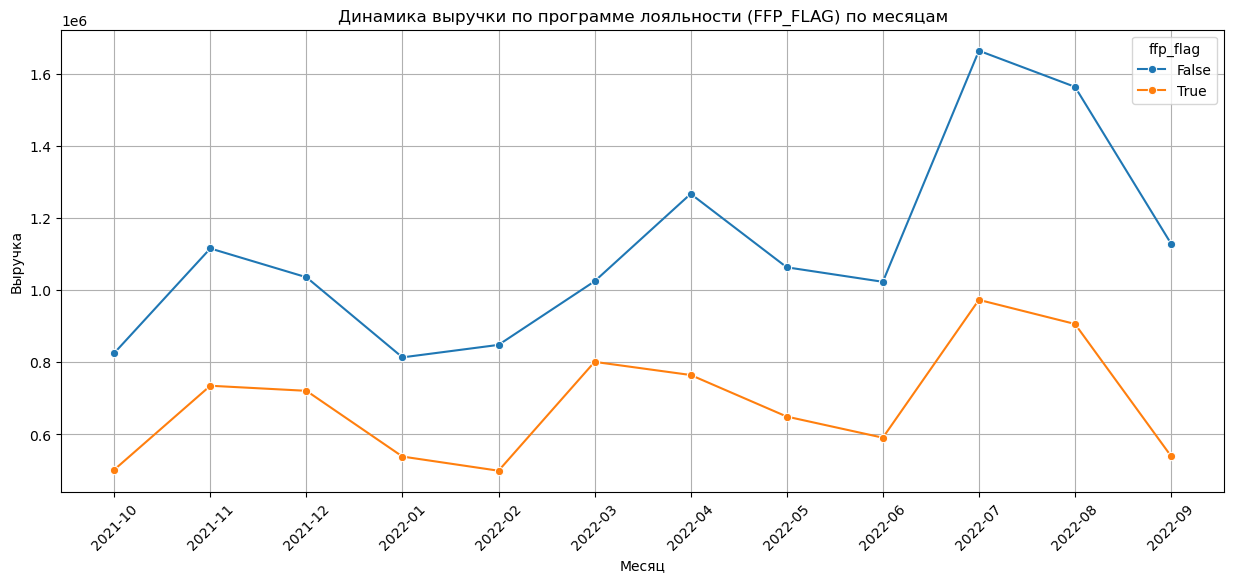

In [81]:
def plot_sales_by_month(df, group_column, title, xlabel='Месяц', ylabel='Выручка'):
    sales_monthly = df.groupby(['issue_month', group_column]).agg({'revenue_amount': 'sum'}).reset_index() #группировка по месяцам и нужной колонке

    print(f'\nТаблица данных для: {title}') #Отображаем таблицу
    print(sales_monthly.head())  #выводим первые 5 строк для краткости
    
    plt.figure(figsize=(15,6)) #визуализируем
    sns.lineplot(x=sales_monthly['issue_month'].astype(str), y=sales_monthly['revenue_amount'], hue=sales_monthly[group_column], marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

plot_sales_by_month(data, 'ffp_flag', 'Динамика выручки по программе лояльности (FFP_FLAG) по месяцам')


Таблица данных для: Динамика выручки по типам перелета (ROUTE_FLIGHT_TYPE) по месяцам
  issue_month route_flight_type  revenue_amount
0     2021-10               ВВЛ         1039020
1     2021-10               МВЛ          288820
2     2021-11               ВВЛ         1528990
3     2021-11               МВЛ          322270
4     2021-12               ВВЛ         1452480


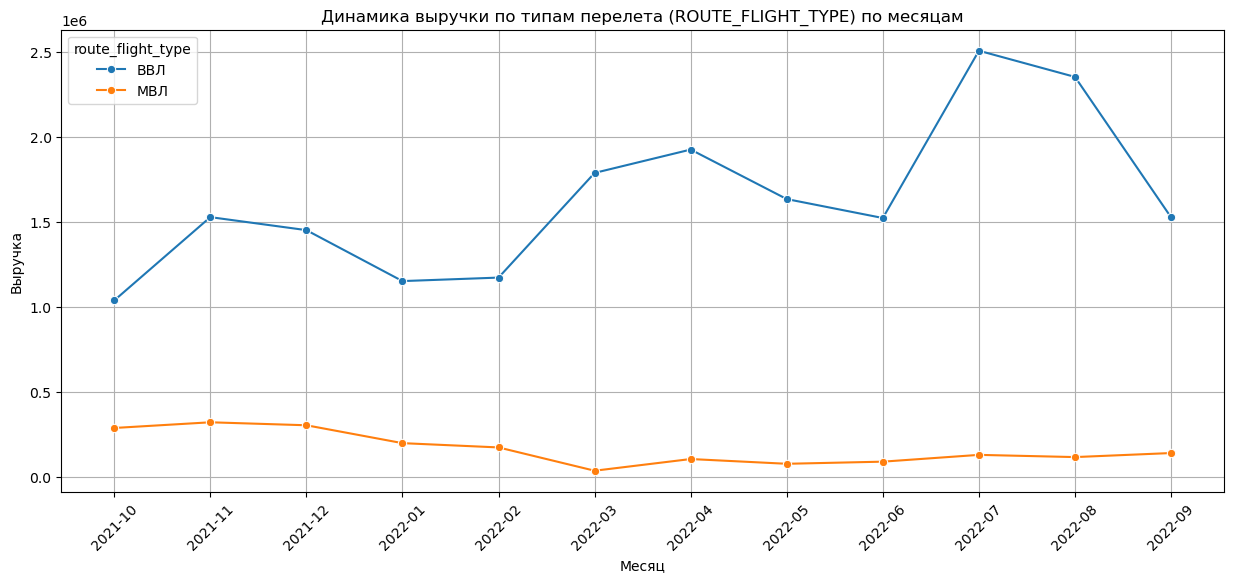

In [82]:
plot_sales_by_month(data, 'route_flight_type', 'Динамика выручки по типам перелета (ROUTE_FLIGHT_TYPE) по месяцам')


Таблица данных для: Динамика выручки по способам покупки (SALE_TYPE) по месяцам
  issue_month sale_type  revenue_amount
0     2021-10   OFFLINE          649640
1     2021-10    ONLINE          678200
2     2021-11   OFFLINE          901140
3     2021-11    ONLINE          950120
4     2021-12   OFFLINE          853050


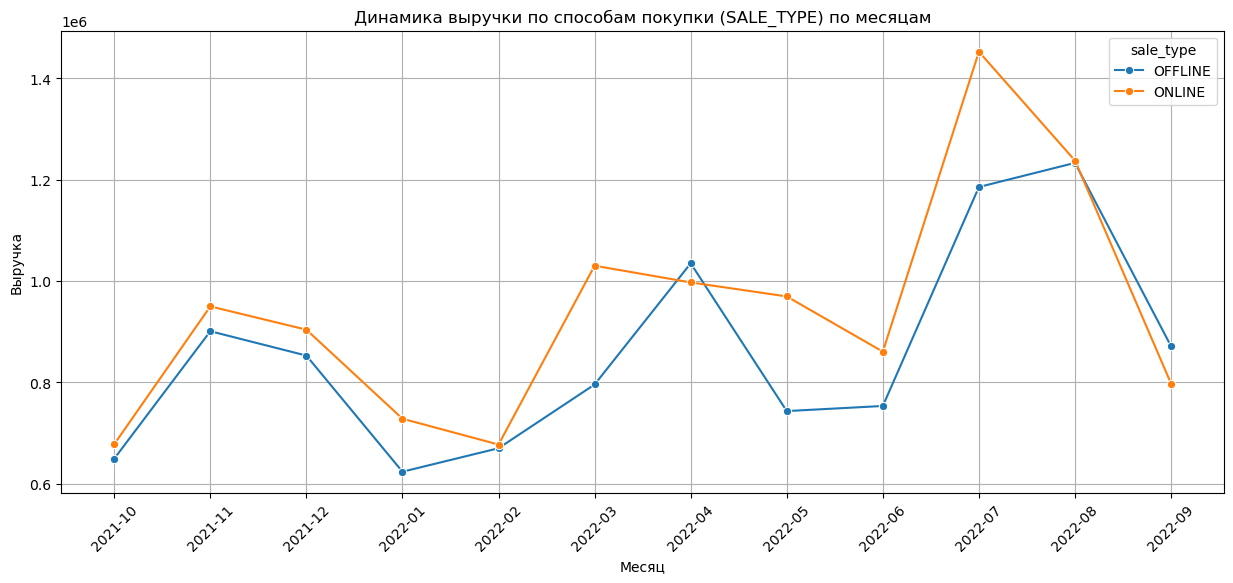

In [83]:
plot_sales_by_month(data, 'sale_type', 'Динамика выручки по способам покупки (SALE_TYPE) по месяцам')


Таблица данных для: Динамика выручки по типам пассажиров (PAX_TYPE) по месяцам
  issue_month pax_type  revenue_amount
0     2021-10       AD         1244720
1     2021-10      CHD           81200
2     2021-10      INF            1920
3     2021-11       AD         1745060
4     2021-11      CHD          105460


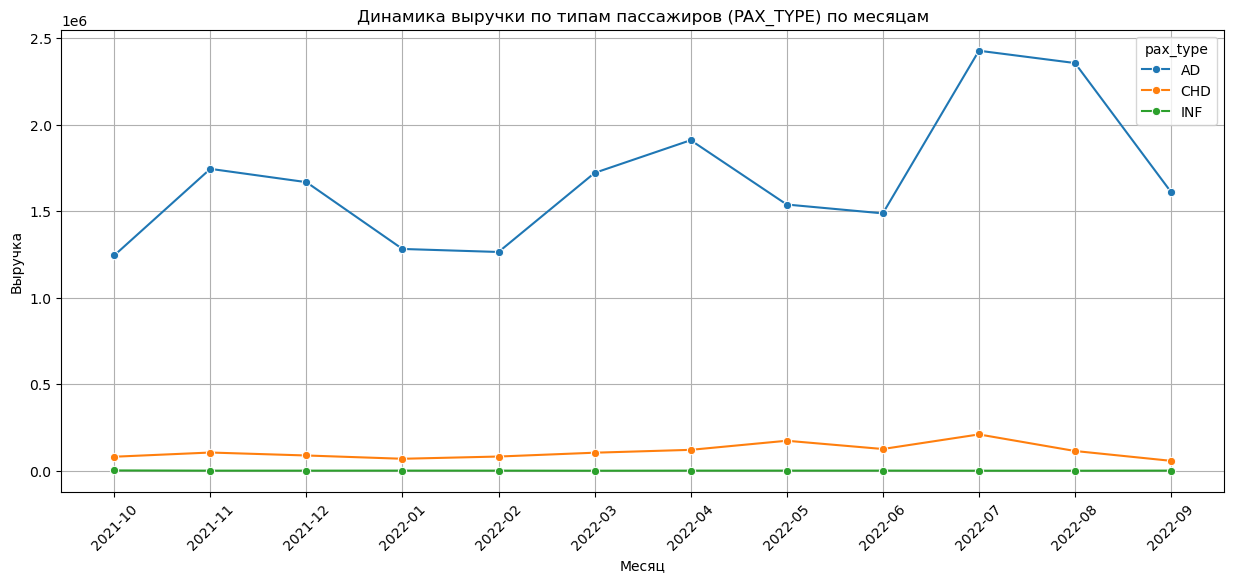

In [84]:
plot_sales_by_month(data, 'pax_type', 'Динамика выручки по типам пассажиров (PAX_TYPE) по месяцам')

***Выводы по графикам с детализацией по полям: `FFP_FLAG`, `ROUTE_FLIGHT_TYPE`, `SALE_TYPE`, `PAX_TYPE`:*** <br>
**Динамика выручки по программе лояльности (`FFP_FLAG`):**
- Линии для участников и неучастников программы лояльности идут примерно одинаково, что может означать, что выручка распределяется равномерно между этими группами, однако видно, что выручка от учатников программы выше, чем от неучастников
<br>

**Динамика выручки по типам перелетов (`ROUTE_FLIGHT_TYPE`):**
- Внутренние перелеты (ВВЛ) и международные перелеты (МВЛ) показывают различную динамику выручки, при этом выручка от внутренних перелетов гораздо выше. Скорее всего, это связано с закрытием границ и другими событиями после 2020 года
<br>

**Динамика выручки по способам покупки (`SALE_TYPE`):**
- Способы покупки  демонстрируют различную динамику. Онлайн-продажи обычно доминируют, что говорит о большей популярности онлайн-каналов по сравнению с оффлайн-продажами
<br>

**Динамика выручки по способам покупки (`PAX_TYPE`):**
- Основная часть выручки приходится на взрослых пассажиров (AD), что логично (хаха), учитывая их доминирование в продажах. Выручка от детей (CHD) и неопределенных категорий (INF) минимальна и почти не влияет на общую картину

*Постройте общие отчеты по выручке по типам пассажиров, по типам перелета, по способам покупки, по программам лояльности. Построим только по типам пассажиров, т.к. по всем остальным показателям графики были составлены выше*

#### Вывод по пункту "3.1 Создайте отчет о динамике продаж (выручке). Постройте линейный график. Повторите отчет с детализацией по полям: FFP_FLAG, ROUTE_FLIGHT_TYPE, SALE_TYPE. Постройте общие отчеты по выручке по типам пассажиров, по типам перелета, по способам покупки, по программам лояльности. Визуализируйте каждый отчет. Решение о детализации отчетов примите самостоятельно"
***Вывод по отчету о динамике выручки по датам:***
- Выручка имеет заметные колебания с периодами роста и снижения. Скорее всего, это связано с сезонными колебаниями спроса на билеты, что характерно для авиаперевозок. Примерами могут быть рост выручки перед Новым годом (2021-11), весенние праздники и сильный рост после июня (объясняющий факт (один из): конец сессии, перелет студентов домой)

***Выводы по графикам с детализацией по полям: `FFP_FLAG`, `ROUTE_FLIGHT_TYPE`, `SALE_TYPE`, `PAX_TYPE`:*** <br>
**Динамика выручки по программе лояльности (`FFP_FLAG`):**
- Линии для участников и неучастников программы лояльности идут примерно одинаково, что может означать, что выручка распределяется равномерно между этими группами, однако видно, что выручка от учатников программы выше, чем от неучастников
<br>

**Динамика выручки по типам перелетов (`ROUTE_FLIGHT_TYPE`):**
- Внутренние перелеты (ВВЛ) и международные перелеты (МВЛ) показывают различную динамику выручки, при этом выручка от внутренних перелетов гораздо выше. Скорее всего, это связано с закрытием границ и другими событиями после 2020 года
<br>

**Динамика выручки по способам покупки (`SALE_TYPE`):**
- Способы покупки  демонстрируют различную динамику. Онлайн-продажи обычно доминируют, что говорит о большей популярности онлайн-каналов по сравнению с оффлайн-продажами
<br>

**Динамика выручки по способам покупки (`PAX_TYPE`):**
- Основная часть выручки приходится на взрослых пассажиров (AD), что логично (хаха), учитывая их доминирование в продажах. Выручка от детей (CHD) и неопределенных категорий (INF) минимальна и почти не влияет на общую картину

<a id='section10'></a>
### 3.2 Исследуйте выручку, примите решение об исключении выбросов для дальнейшего исследования, руководствуясь минимизацией потерь в данных

In [89]:
data['revenue_amount'].describe()

count    49362.000000
mean       437.631579
std        214.611412
min         10.000000
25%        290.000000
50%        400.000000
75%        550.000000
max       5200.000000
Name: revenue_amount, dtype: float64

*Построим графики распределения выручки*

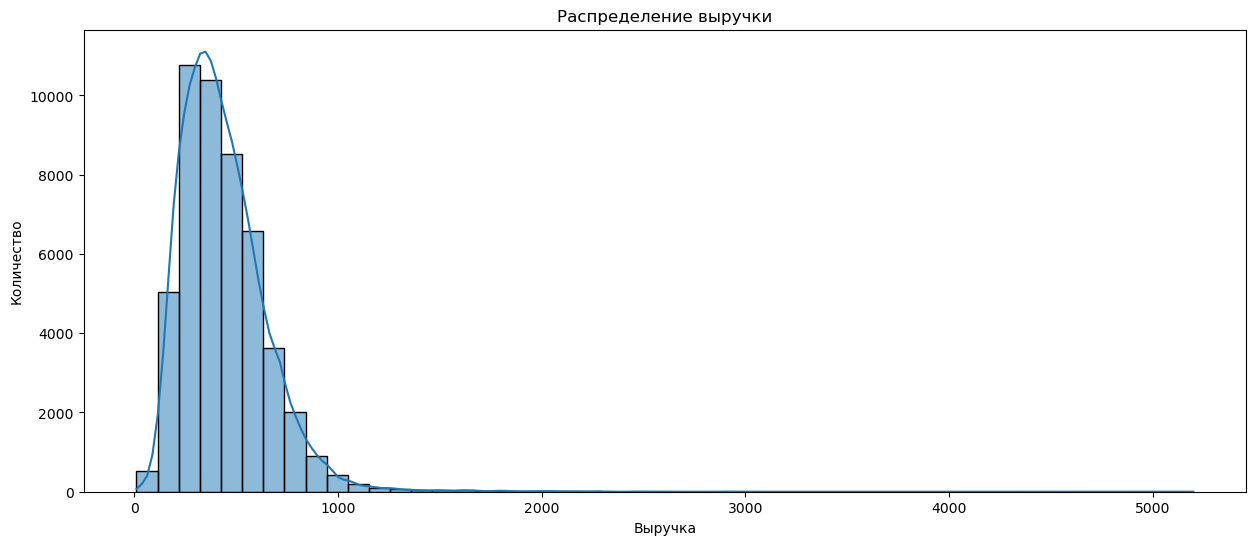

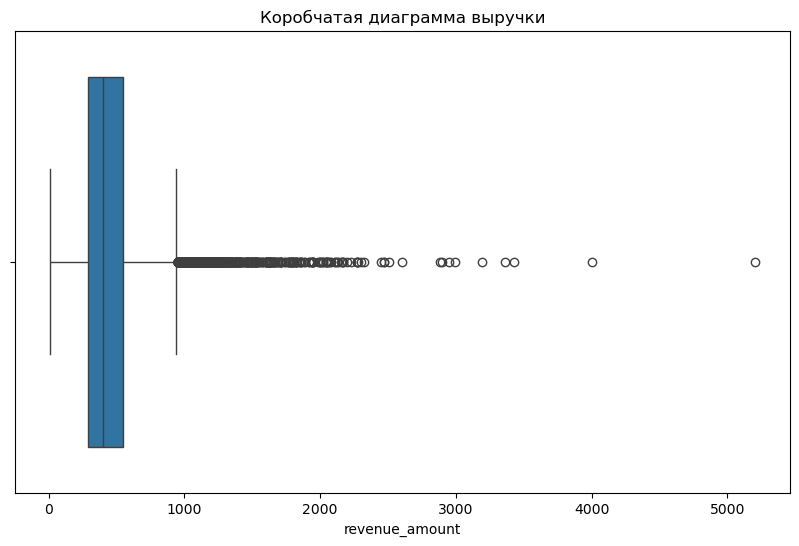

In [91]:
plt.figure(figsize=(15,6))
sns.histplot(data['revenue_amount'], bins=50, kde=True)
plt.title('Распределение выручки')
plt.xlabel('Выручка')
plt.ylabel('Количество')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x=data['revenue_amount'])
plt.title('Коробчатая диаграмма выручки')
plt.show()

*Теперь определим выбросы*

In [93]:
Q1 = data['revenue_amount'].quantile(0.25)
Q3 = data['revenue_amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR #нижняя граница выбросов
upper_bound = Q3 + 1.5 * IQR #верхняя граница выбросов

print(f'Нижняя граница: {lower_bound}, Верхняя граница: {upper_bound}')

outliers = data[(data['revenue_amount'] < lower_bound) | (data['revenue_amount'] > upper_bound)]
proc = len(outliers) / data.shape[0] * 100
print(f'Количество выбросов: {len(outliers)}, что составляет {proc} процентов датасета')

Нижняя граница: -100.0, Верхняя граница: 940.0
Количество выбросов: 987, что составляет 1.9995137960374376 процентов датасета


*Примечание: Нижняя граница равна -100.0, что невозможно для выручки, поэтому она считается 0 <br>
Количество выбросов равно примерно 2 процентам, поэтому можно их исключить, т.к. это лишь малая часть датасета*

In [95]:
data_cleaned = data[(data['revenue_amount'] >= lower_bound) & (data['revenue_amount'] <= upper_bound)]
print(f'Количество строк до исключения выбросов: {len(data)}')
print(f'Количество строк после исключения выбросов: {len(data_cleaned)}')

Количество строк до исключения выбросов: 49362
Количество строк после исключения выбросов: 48375


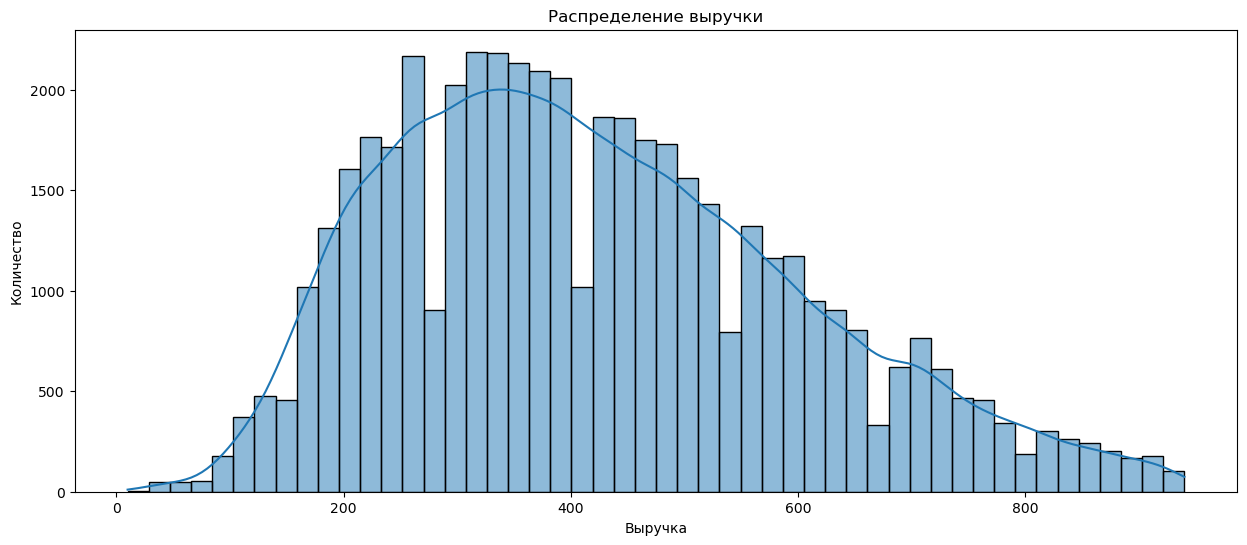

In [96]:
plt.figure(figsize=(15,6))
sns.histplot(data_cleaned['revenue_amount'], bins=50, kde=True)
plt.title('Распределение выручки')
plt.xlabel('Выручка')
plt.ylabel('Количество')
plt.show()

*Проверим, имеет ли нормальное распределение новый датасет (обновленный) с помощью критерия и qq-теста*

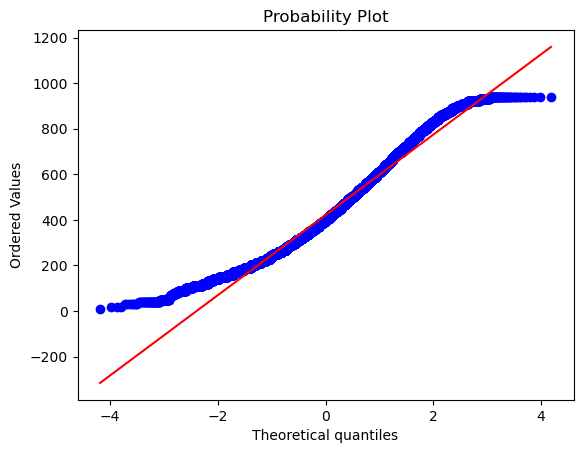

In [98]:
st.probplot(data_cleaned['revenue_amount'], dist='norm', plot=plt)
plt.show()

*Используем тест Шапиро-Уилка, чтобы проверить гипотезу о нормальном распределении*

**Нулевая гипотеза (H0):** распределение нормально <br>
**Альтернативная гипотеза (H1):** распределение ненормально

In [101]:
# тест Шапиро-Уилка для salaries
alpha = .05 

results = st.shapiro(data_cleaned['revenue_amount'])
p_value = results[1] 

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  1.2383846642751228e-65
Отвергаем нулевую гипотезу: распределение не нормально


C:\Users\HP\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 48375.
  res = hypotest_fun_out(*samples, **kwds)


#### Вывод по пункту "3.2 Исследуйте выручку, примите решение об исключении выбросов для дальнейшего исследования, руководствуясь минимизацией потерь в данных" 
- При исследовании выручки были выявлены выбросы с использованием метода межквартильного размаха (IQR). Верхняя граница для выручки составила 940, нижняя граница была установлена на уровне 0
- В результате анализа было обнаружено 987 выбросов, которые составили менее 2% данных, что позволило исключить их без значительных потерь данных
- После исключения выбросов было проведено исследование распределения выручки: визуальный анализ (гистограмма и график плотности), qq-тест и статистический тест Шапиро-Уилка показали, что выручка в очищенных данных не имеет нормального распределения

<a id='section11'></a>
### 3.3 Исследуйте сезонность продаж. Дополнительно проверьте гипотезу о том, что выручка от продаж осенью и зимой отличается. Исследуйте выручку и число продаж по месяцам, проверьте корреляцию

*Исследуем сезонность продаж*

In [105]:
data_cleaned['issue_month'] = data_cleaned['issue_date'].dt.to_period('M')

C:\Users\HP\AppData\Local\Temp\ipykernel_13072\3103846314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['issue_month'] = data_cleaned['issue_date'].dt.to_period('M')


In [106]:
monthly_sales = data_cleaned.groupby('issue_month').agg({'revenue_amount': 'sum', 'issue_date': 'count'}).reset_index()
monthly_sales.rename(columns={'issue_date': 'sales_count'}, inplace=True)
monthly_sales.head()

,issue_month,revenue_amount,sales_count
0,2021-10,1280870,3579
1,2021-11,1766940,5109
2,2021-12,1666010,4490
3,2022-01,1304090,3552
4,2022-02,1297190,3414


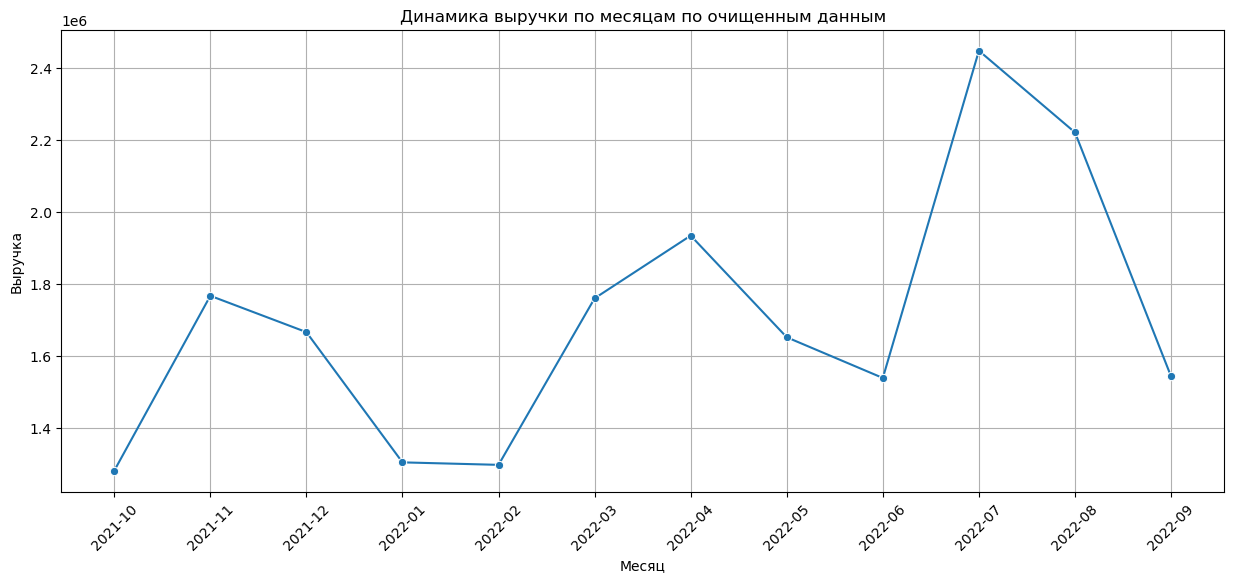

In [107]:
plt.figure(figsize=(15,6))
sns.lineplot(x=monthly_sales['issue_month'].astype(str), y=monthly_sales['revenue_amount'], marker='o')
plt.title('Динамика выручки по месяцам по очищенным данным')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

*Проверим гипотезы о различии выручки осенью и зимой*

In [109]:
autumn = data_cleaned[data_cleaned['issue_date'].dt.month.isin([9, 10, 11])] #данные за осень
winter = data_cleaned[data_cleaned['issue_date'].dt.month.isin([12, 1, 2])] #данные за зиму

**H0:** Средние значения выборок осенью и зимой равны между собой <br>
**H1:** Средние значения выборок осенью и зимой не равны между собой

In [112]:
alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу
results = st.mannwhitneyu(autumn['revenue_amount'], winter['revenue_amount'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

p-значение:  0.4549933504837227
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


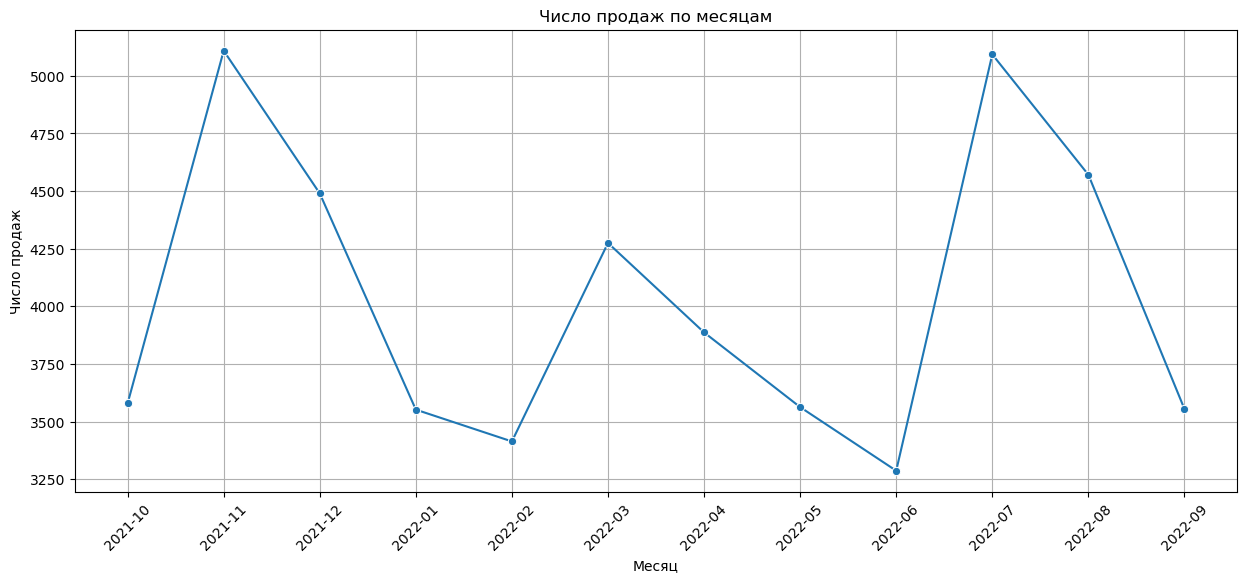

In [113]:
plt.figure(figsize=(15,6))
sns.lineplot(x=monthly_sales['issue_month'].astype(str), y=monthly_sales['sales_count'], marker='o')
plt.title('Число продаж по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Число продаж')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

*Проверим корреляцию между числом продаж и выручкой*

In [115]:
correlation = monthly_sales['revenue_amount'].corr(monthly_sales['sales_count'])
print(f"Корреляция между выручкой и числом продаж: {correlation}")

Корреляция между выручкой и числом продаж: 0.7531341970310438


#### Вывод по пункту "3.3 Исследуйте сезонность продаж. Дополнительно проверьте гипотезу о том, что выручка от продаж осенью и зимой отличается. Исследуйте выручку и число продаж по месяцам, проверьте корреляцию"
- Динамика выручки по месяцам: график показывает явные сезонные колебания выручки, с периодами подъема и спада в течение года (все то же самое, что и раньше, только без выбросов)
- Была проверена гипотеза о различии выручки осенью и зимой, выдвинуты нулевая и альтернативная гипотезы. P-значение больше 0.05, что означает, что нет значимой статистической разницы в выручке между осенью и зимой
- Провели мини-исследование числа продаж по месяцам: число продаж также варьируется по месяцам, что свидетельствует о сезонности спроса (подтверждение ранее сказанного)
- Была изучена корреляция между выручкой и числом продаж: она составляет 0.75, что указывает на сильную положительную связь — с увеличением числа продаж выручка также растет

<a id='section12'></a>
### 3.4 Клиенты покупают билеты в разное время. Кто-то покупает билеты заранее, другие - в последний момент. Проверьте гипотезу о том, что выручка от продажи билетов для этих двух групп клиентов отличается. Предварительно разбейте клиентов минимум на три группы

*Создадим новый столбец, в котором определим разницу в днях между покупкой билета и отправлением*

In [119]:
data_cleaned['days_before_flight'] = (data_cleaned['flight_date_loc'] - data_cleaned['issue_date']).dt.days

C:\Users\HP\AppData\Local\Temp\ipykernel_13072\4032475790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['days_before_flight'] = (data_cleaned['flight_date_loc'] - data_cleaned['issue_date']).dt.days


*Теперь разобьём людей на три группы в зависимости от покупки билета:* <br>
**Первая группа (`early_booking`)**: покупают билеты сильно заранее (например, за 30 и более дней до полета)<br>
**Вторая группа (`medium_booking`)**: покупают билеты за 7–30 дней<br>
**Третья группа (`last_minute_booking`)**: покупают билеты в последний момент (за 7 и менее дней до полета)

In [121]:
def categorize_client(row):
    if row['days_before_flight'] >= 30:
        return 'early_booking'
    elif 7 <= row['days_before_flight'] < 30:
        return 'medium_booking'
    else:
        return 'last_minute_booking'

data_cleaned['booking_group'] = data_cleaned.apply(categorize_client, axis=1)

C:\Users\HP\AppData\Local\Temp\ipykernel_13072\892364329.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['booking_group'] = data_cleaned.apply(categorize_client, axis=1)


In [122]:
data_cleaned['booking_group'].value_counts()

booking_group
last_minute_booking    19394
medium_booking         18890
early_booking          10091
Name: count, dtype: int64

*Проверьте гипотезу о том, что выручка от продажи билетов для этих двух групп клиентов отличается. Учтем поправку Бонферрони*

**H0:** Выручка в группах статистически значимо не отличается <br>
**H1:** Выручка в группах статистически значимо отличается

In [126]:
def revenue_t_test_with_bonferroni(group_a, group_b, alpha_level, num_tests):
    bonferroni_alpha = alpha_level / num_tests #поправка Бонферрони
    revenue_a = data_cleaned[data_cleaned['booking_group'] == group_a]['revenue_amount'] #выручка в группе A
    revenue_b = data_cleaned[data_cleaned['booking_group'] == group_b]['revenue_amount'] #выручка в группе B

    results = st.ttest_ind(revenue_a, revenue_b)
    print(f'Корректированный уровень значимости (Бонферрони): {bonferroni_alpha:.4f}')
    print('p-значение:', results.pvalue)
    
    if results.pvalue < bonferroni_alpha:
        print(f'Отвергаем нулевую гипотезу: выручка в группах {group_a} и {group_b} отличается значимо')
    else:
        print(f'Не получилось отвергнуть нулевую гипотезу: выручка в группах {group_a} и {group_b} не отличается значимо') 
alpha = 0.05 #уровень, который мы хотим получить
num_tests = 3  #3 сравнения между группами

In [127]:
revenue_t_test_with_bonferroni('early_booking', 'medium_booking', alpha, num_tests)

Корректированный уровень значимости (Бонферрони): 0.0167
p-значение: 1.4105005851117056e-09
Отвергаем нулевую гипотезу: выручка в группах early_booking и medium_booking отличается значимо


In [128]:
revenue_t_test_with_bonferroni('medium_booking', 'last_minute_booking', alpha, num_tests)

Корректированный уровень значимости (Бонферрони): 0.0167
p-значение: 1.1284934731943294e-11
Отвергаем нулевую гипотезу: выручка в группах medium_booking и last_minute_booking отличается значимо


In [129]:
revenue_t_test_with_bonferroni('early_booking', 'last_minute_booking', alpha, num_tests)

Корректированный уровень значимости (Бонферрони): 0.0167
p-значение: 1.5680921992745034e-32
Отвергаем нулевую гипотезу: выручка в группах early_booking и last_minute_booking отличается значимо


**Как итог, мы отвергаем нулевыую гипотезу, раасмотрев три теста: есть статистическая значимость в разности выручки от продажи билетов. Это означает, что выручка тех, кто купил билет, например, более, чем за 30 дней, статистически значимо отличается от тех, кто купил в последние дни до отправления самолета**

#### Вывод по пункту "3.4 Клиенты покупают билеты в разное время. Кто-то покупает билеты заранее, другие - в последний момент. Проверьте гипотезу о том, что выручка от продажи билетов для этих двух групп клиентов отличается. Предварительно разбейте клиентов минимум на три группы"
Мы разделили пассажиров на три группы: <br>
**Первая группа (`early_booking`)**: покупают билеты сильно заранее (например, за 30 и более дней до полета)<br>
**Вторая группа (`medium_booking`)**: покупают билеты за 7–30 дней<br>
**Третья группа (`last_minute_booking`)**: покупают билеты в последний момент (за 7 и менее дней до полета) <br><br>
И с этими группами провели тесты, в которых определили, является ли разница в выручке статистически значимой <br>
**Как итог, мы отвергаем нулевыую гипотезу, раасмотрев три теста: есть статистическая значимость в разности выручки от продажи билетов. Это означает, что выручка тех, кто купил билет, например, более, чем за 30 дней, статистически значимо отличается от тех, кто купил в последние дни до отправления самолета**

<a id='section13'></a>
### 3.5  Определите топ-10 популярных направлений перелета (город-город) отдельно для ВМЛ и МВЛ. Изучите выручку для этих направлений. Для этого добавьте в датасет сведения о городах, используя данные из датасета

*Извлечем нужные колонки: `iata` и город, чтобы использовать их для сопоставления*

In [135]:
df_36.columns

Index(['name', 'city', 'country', 'iata', 'icao', 'latitude', 'longitude',
       'altitude', 'timezone', 'dst', 'tz_database_timezone', 'type',
       'source'],
      dtype='object')

In [136]:
df_36 = df_36[['iata', 'city']]

In [137]:
data_new = pd.merge(data_cleaned, df_36, how = 'left', left_on = 'orig_city_code', right_on = 'iata')
data_new.rename(columns = {'city' : 'orig_city'}, inplace = True)
data_new = pd.merge(data_new, df_36, how = 'left', left_on = 'dest_city_code', right_on = 'iata')
data_new.rename(columns = {'city' : 'dest_city'}, inplace = True)
data_new.head()

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,issue_month,days_before_flight,booking_group,iata_x,orig_city,iata_y,dest_city
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,False,ONLINE,2021-12,35,early_booking,NaN,NaN,KGD,Kaliningrad
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,False,OFFLINE,2021-12,3,last_minute_booking,UUS,Yuzhno-sakhalinsk,OVB,Novosibirsk
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,True,ONLINE,2021-11,37,early_booking,KGD,Kaliningrad,NaN,NaN
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,False,ONLINE,2021-12,28,medium_booking,VOZ,Voronezh,NaN,NaN
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,True,OFFLINE,2021-12,35,early_booking,NaN,NaN,KRR,Krasnodar


In [138]:
data_new.groupby('orig_city_code')['iata_x'].apply(lambda x: x.isna().sum()).sort_values(ascending= False).head()

orig_city_code
MOW    15665
GRV      137
BAK       74
NQZ       10
MIL        9
Name: iata_x, dtype: int64

In [139]:
data_new.groupby('dest_city_code')['iata_y'].apply(lambda x: x.isna().sum()).sort_values(ascending= False).head()

dest_city_code
MOW    15801
GRV      111
BAK       84
NQZ       14
TOX       12
Name: iata_y, dtype: int64

In [140]:
data_new.isna().sum()

issue_date                0
flight_date_loc           0
pax_type                  0
revenue_amount            0
orig_city_code            0
dest_city_code            0
route_flight_type         0
ffp_flag                  0
sale_type                 0
issue_month               0
days_before_flight        0
booking_group             0
iata_x                15933
orig_city             15933
iata_y                16037
dest_city             16037
dtype: int64

In [141]:
orig_city_dict = {
    'MOW': 'Moscow',
    'GRV': 'Grozny',
    'BAK': 'Baku',
    'SEL': 'Seoul',
    'NQZ': 'Astana',
    'MIL': 'Milan',
    'PAR': 'Paris',
    'TOX': 'Tobolsk',
    'BER': 'Berlin',
    'ROM': 'Rome',
    'OHH': 'Okha',
    'LON': 'London',
    'TYO': 'Tokyo',
    'OSS': 'Osh',
    'MRV': 'Mineralnye Vody',
    'BJS' : 'Beijing'
}

data_new['orig_city'] = data_new['orig_city'].fillna(data_new['orig_city_code'].map(orig_city_dict))
data_new['dest_city'] = data_new['dest_city'].fillna(data_new['dest_city_code'].map(orig_city_dict))
data_new.drop(['iata_x', 'iata_y'], axis = 1, inplace = True)

In [142]:
data_new.isna().sum()

issue_date            0
flight_date_loc       0
pax_type              0
revenue_amount        0
orig_city_code        0
dest_city_code        0
route_flight_type     0
ffp_flag              0
sale_type             0
issue_month           0
days_before_flight    0
booking_group         0
orig_city             0
dest_city             0
dtype: int64

*Необходимо создать столбец с отправлением*

In [144]:
data_new['route'] = data_new['orig_city'] + " - " + data_new['dest_city']

In [145]:
data_new['flight_type'] = data_new['route_flight_type'].apply(lambda x: 'ВМЛ' if x == 'ВВЛ' else 'МВЛ') #определяем внутренние (ВМЛ) и международные рейсы (МВЛ)

In [146]:
top_routes_vml = data_new[data_new['flight_type'] == 'ВМЛ']['route'].value_counts().head(10) #оставляем только топ-10
top_routes_vml

route
Sochi - Moscow             1326
Moscow - Sochi             1292
St. Petersburg - Moscow    1211
Moscow - St. Petersburg    1190
Novosibirsk - Moscow        967
Moscow - Novosibirsk        944
Kazan - Moscow              759
Moscow - Kazan              757
Moscow - Ufa                708
Novosibirsk - Sochi         668
Name: count, dtype: int64

In [147]:
top_routes_mvl = data_new[data_new['flight_type'] == 'МВЛ']['route'].value_counts().head(10) #оставляем только топ-10
top_routes_mvl

route
Moscow - Osh               151
Khudzhand - Moscow         144
Osh - Moscow               136
Moscow - Khudzhand         129
Novosibirsk - Bishkek      120
Novosibirsk - Osh          119
Khudzhand - Novosibirsk    116
Osh - Novosibirsk          115
Bishkek - Novosibirsk      102
Moscow - Antalya           101
Name: count, dtype: int64

In [148]:
revenue_vml = data_new[data_new['route'].isin(top_routes_vml.index)].groupby('route')['revenue_amount'].sum().sort_values(ascending=False)
revenue_vml

route
Sochi - Moscow             513970
Moscow - Sochi             480480
Novosibirsk - Moscow       460720
Moscow - Novosibirsk       440440
Novosibirsk - Sochi        382470
St. Petersburg - Moscow    280870
Moscow - St. Petersburg    273720
Moscow - Ufa               210610
Kazan - Moscow             205230
Moscow - Kazan             204660
Name: revenue_amount, dtype: int64

In [149]:
revenue_mvl = data_new[data_new['route'].isin(top_routes_mvl.index)].groupby('route')['revenue_amount'].sum().sort_values(ascending=False)
revenue_mvl

route
Khudzhand - Moscow         95190
Osh - Moscow               80920
Moscow - Osh               68130
Khudzhand - Novosibirsk    57740
Moscow - Khudzhand         57710
Osh - Novosibirsk          56980
Bishkek - Novosibirsk      48300
Novosibirsk - Osh          47450
Novosibirsk - Bishkek      46980
Moscow - Antalya           38080
Name: revenue_amount, dtype: int64

*Визуализируем всё то, что выше было найдено*

In [151]:
def plot_top_routes(routes, title):
    plt.figure(figsize=(15, 6))
    routes.sort_values().plot(kind='barh', color='skyblue')
    plt.title(title)
    plt.xlabel('Количество рейсов')
    plt.ylabel('Направление')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

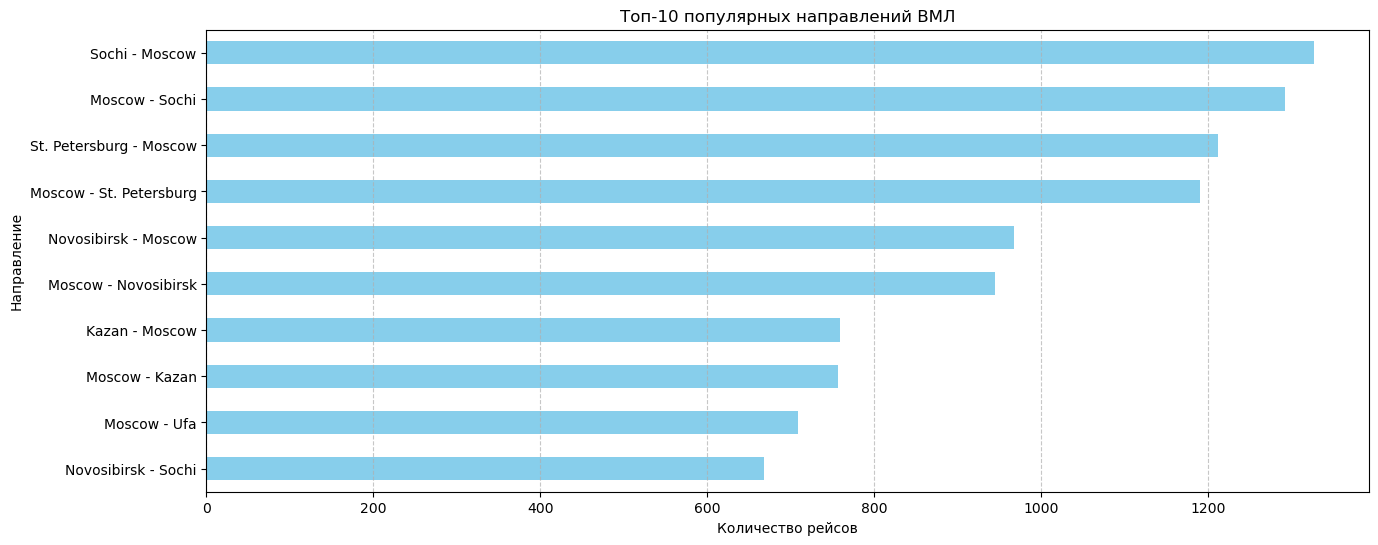

In [152]:
plot_top_routes(top_routes_vml, 'Топ-10 популярных направлений ВМЛ') #для ВМЛ

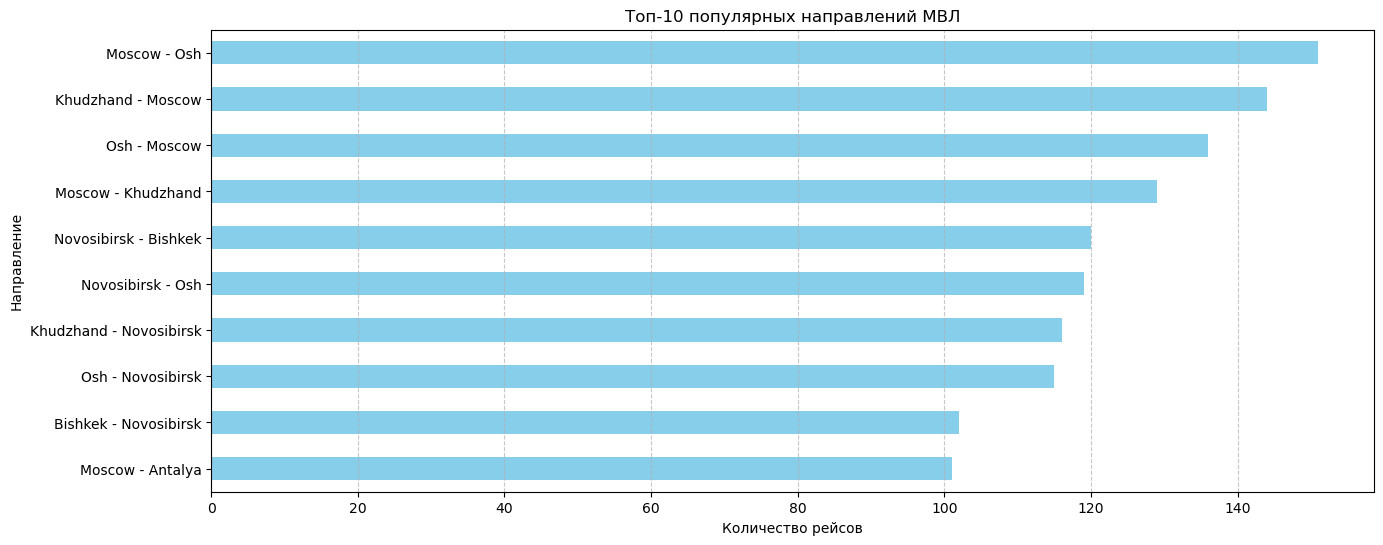

In [153]:
plot_top_routes(top_routes_mvl, 'Топ-10 популярных направлений МВЛ')

In [154]:
def plot_revenue(revenue, title): #теперь для выручки
    plt.figure(figsize=(15, 6))
    revenue.sort_values().plot(kind='barh', color='lightgreen')
    plt.title(title)
    plt.xlabel('Выручка')
    plt.ylabel('Направление')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

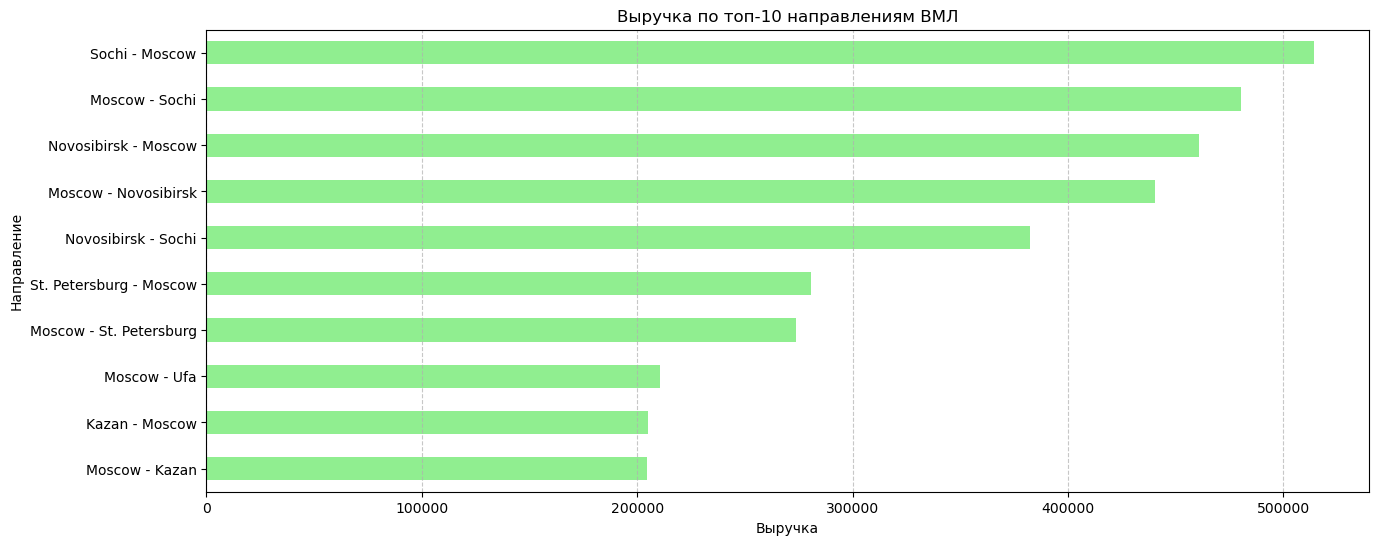

In [155]:
plot_revenue(revenue_vml, 'Выручка по топ-10 направлениям ВМЛ')

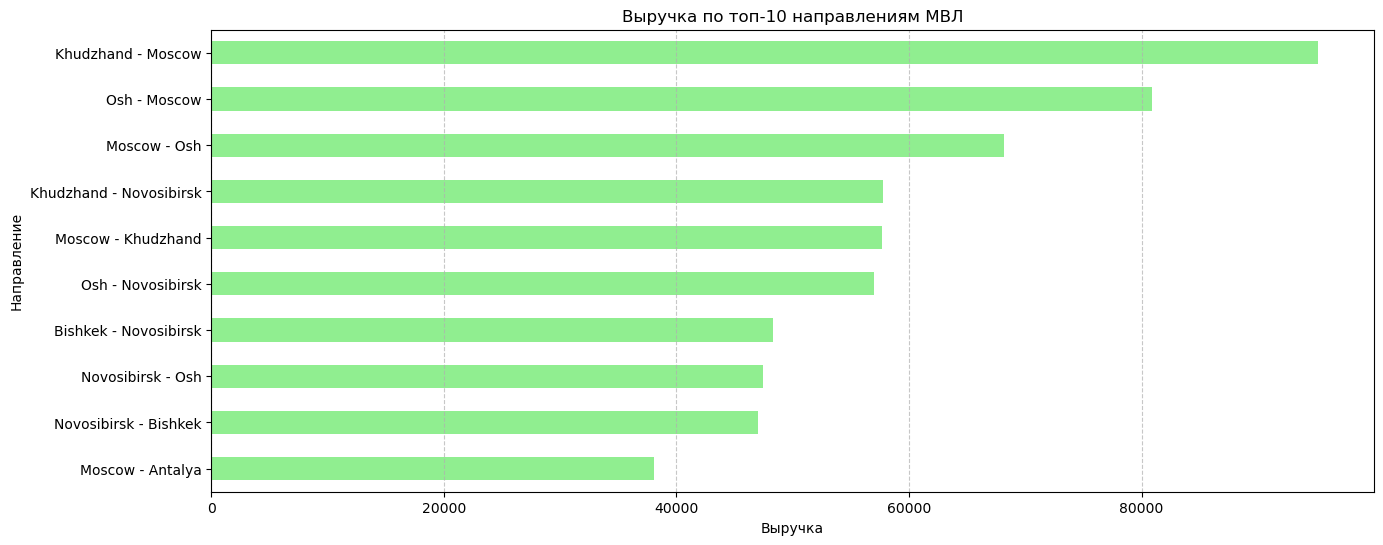

In [156]:
plot_revenue(revenue_mvl, 'Выручка по топ-10 направлениям МВЛ')

***Дополнительно проведем анализ сезонности, только теперь немного иначе, и исследуем среднюю выручку на пассажира по разным направлениям***

*Добавим колонку с месяцем вылета*

In [159]:
data_new['flight_month'] = data_new['flight_date_loc'].dt.to_period('M')

*Сгруппируем данные и посчитаем количество и выручку с каждого месяца*

In [161]:
flights_per_month = data_new.groupby('flight_month')['route'].count() #количество
flights_per_month.head()

flight_month
2021-10    1712
2021-11    4511
2021-12    4110
2022-01    5059
2022-02    2230
Freq: M, Name: route, dtype: int64

In [162]:
revenue_per_month = data_new.groupby('flight_month')['revenue_amount'].sum() #выручка
revenue_per_month.head()

flight_month
2021-10     613430
2021-11    1592670
2021-12    1507430
2022-01    1815020
2022-02     810980
Freq: M, Name: revenue_amount, dtype: int64

*Визуализируем полученную выше информацию*

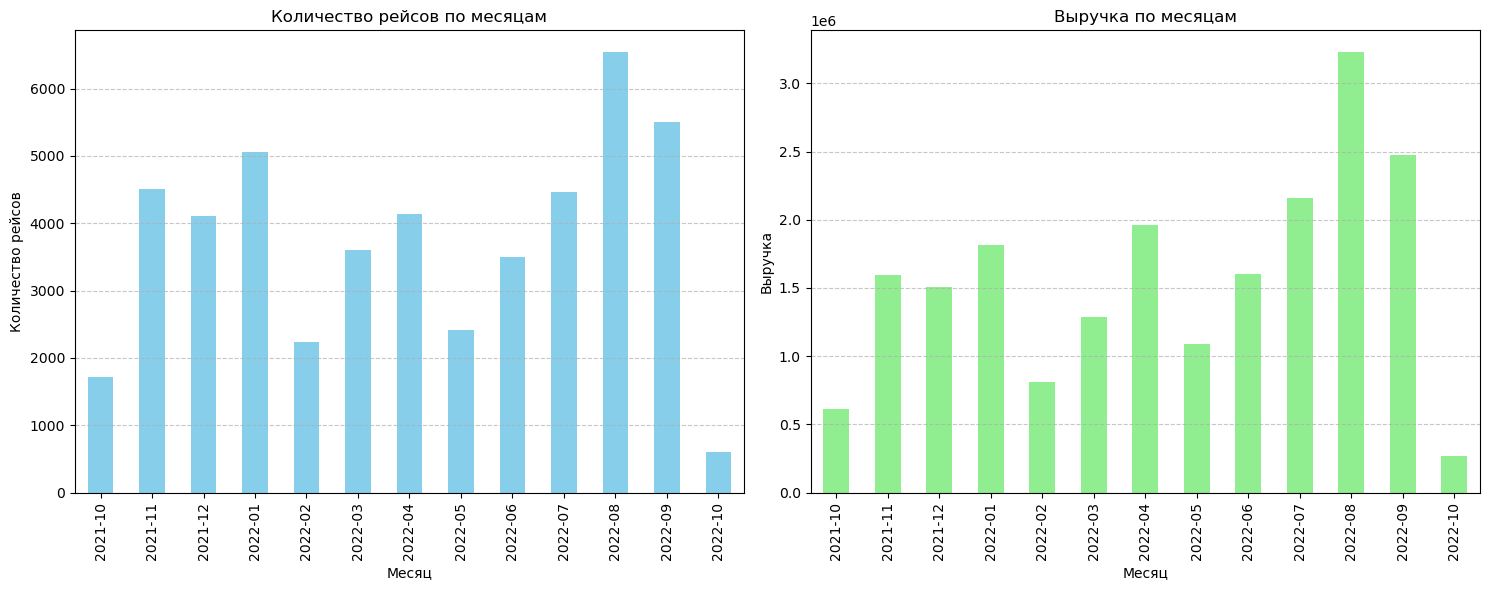

In [164]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1) #сделаем на одной линии графики
flights_per_month.plot(kind='bar', color='skyblue') #для количества рейсов
plt.title('Количество рейсов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество рейсов')
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.subplot(1, 2, 2)
revenue_per_month.plot(kind='bar', color='lightgreen') #для выручки
plt.title('Выручка по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

*Проведем анализ средней выручки на пассажира по разным направлениям*

In [166]:
data_new['passenger_count'] = 1 #будем считать, что одна строка = 1 пассажир

*Сруппируем данные по маршрутам и рассчитаем среднюю выручку на пассажира отдельно для внутренних и внешних рейсов*

In [168]:
average_revenue_per_passenger_vml = data_new[data_new['flight_type'] == 'ВМЛ'].groupby('route').apply(
    lambda x: x['revenue_amount'].sum() / x['passenger_count'].sum()
) #внутренние рейсы

C:\Users\HP\AppData\Local\Temp\ipykernel_13072\1585819898.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  average_revenue_per_passenger_vml = data_new[data_new['flight_type'] == 'ВМЛ'].groupby('route').apply(


In [169]:
average_revenue_per_passenger_mvl = data_new[data_new['flight_type'] == 'МВЛ'].groupby('route').apply(
    lambda x: x['revenue_amount'].sum() / x['passenger_count'].sum()
) #внешние рейсы

C:\Users\HP\AppData\Local\Temp\ipykernel_13072\4074895803.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  average_revenue_per_passenger_mvl = data_new[data_new['flight_type'] == 'МВЛ'].groupby('route').apply(


In [170]:
top_avg_revenue_routes_vml = average_revenue_per_passenger_vml.sort_values(ascending=False).head(10) #топ-10 для внутренних

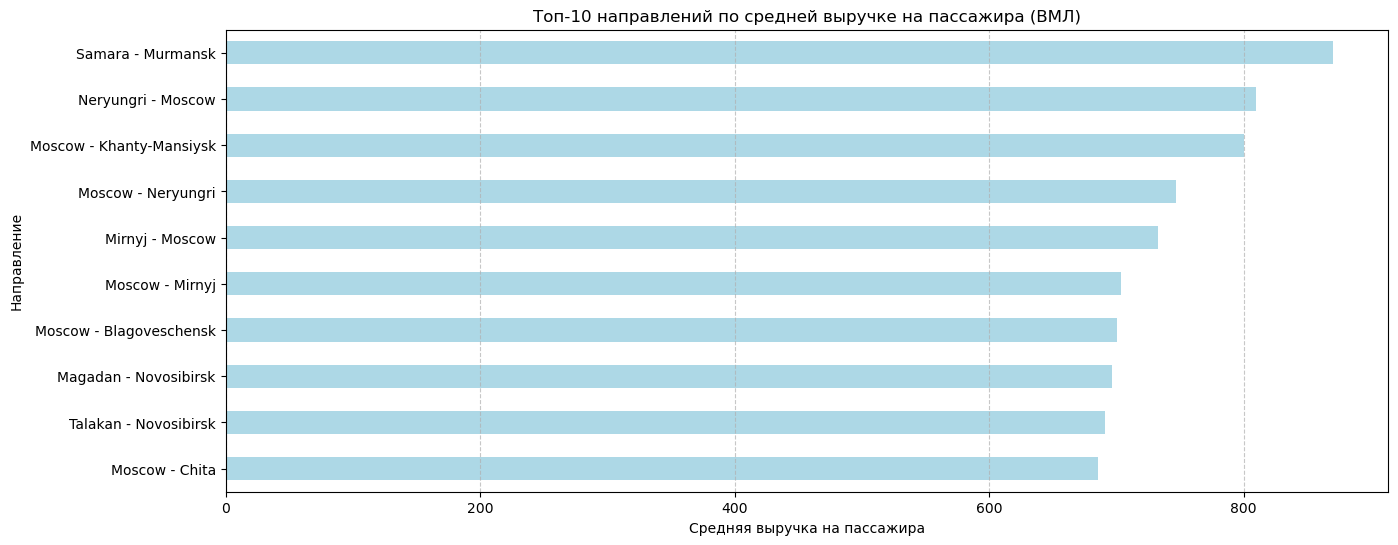

In [171]:
plt.figure(figsize=(15, 6))
top_avg_revenue_routes_vml.sort_values().plot(kind='barh', color='lightblue')
plt.title('Топ-10 направлений по средней выручке на пассажира (ВМЛ)')
plt.xlabel('Средняя выручка на пассажира')
plt.ylabel('Направление')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [172]:
top_avg_revenue_routes_mvl = average_revenue_per_passenger_mvl.sort_values(ascending=False).head(10) #топ-10 для внешних

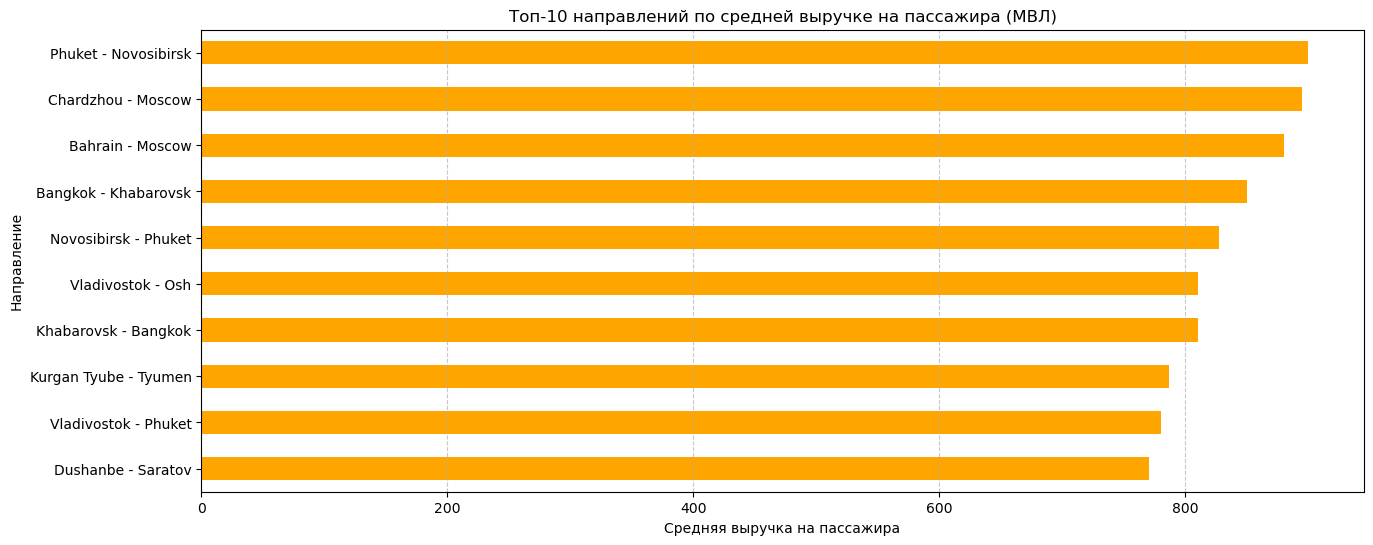

In [173]:
plt.figure(figsize=(15, 6))
top_avg_revenue_routes_mvl.sort_values().plot(kind='barh', color='orange')
plt.title('Топ-10 направлений по средней выручке на пассажира (МВЛ)')
plt.xlabel('Средняя выручка на пассажира')
plt.ylabel('Направление')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#### Вывод по пункту "3.5 Определите топ-10 популярных направлений перелета (город-город) отдельно для ВМЛ и МВЛ. Изучите выручку для этих направлений. Для этого добавьте в датасет сведения о городах, используя данные из датасета"
По результатам анализа и визуализации топ-10 популярных направлений для ВМЛ и МВЛ, а также выручки по этим направлениям, было выявлено следующее: <br>
**ВМЛ (внутренние рейсы):**
- Наиболее популярные маршруты: Сочи - Москва, Москва - Сочи, а также Санкт-Петербург - Москва. Эти направления приносят высокую выручку, что связано с популярностью туристических городов
<br>
  
**МВЛ (международные рейсы):**
- Международные направления также приносят выручку, однако выручка по сравнению с внутренними рейсами их количество гораздо меньше (в несколько раз), что было уже рассмотрено и объяснено выше
<br>
<br>

Дополнительно был проведен анализ сезонности, только теперь немного иначе, и исследована средняя выручка на пассажира по разным направлениям. Результаты следующие:
<br>

**Средняя выручка на пассажира для ВМЛ:**
- Наиболее прибыльные направления по средней выручке на пассажира включают рейсы между крупными городами, такими как Самара - Мурманск
<br>

**Средняя выручка на пассажира для МВЛ:**
- Международные направления в среднем показывают более высокую среднюю выручку на пассажира, особенно по маршрутам, соединяющим крупные хабы и популярные туристические направления

<a id='section14'></a>
### 3.6 Определите есть ли зависимость выручки от других признаков. Постройте матрицу корреляций

*Чтобы построить матрицу корреляции, необходимо очистить фрейм*

In [177]:
data_new.head(1)

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,issue_month,days_before_flight,booking_group,orig_city,dest_city,route,flight_type,flight_month,passenger_count
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,False,ONLINE,2021-12,35,early_booking,Moscow,Kaliningrad,Moscow - Kaliningrad,ВМЛ,2022-01,1


In [178]:
data_new.dtypes

issue_date            datetime64[ns]
flight_date_loc       datetime64[ns]
pax_type                      object
revenue_amount                 int64
orig_city_code                object
dest_city_code                object
route_flight_type             object
ffp_flag                        bool
sale_type                     object
issue_month                period[M]
days_before_flight             int64
booking_group                 object
orig_city                     object
dest_city                     object
route                         object
flight_type                   object
flight_month               period[M]
passenger_count                int64
dtype: object

In [179]:
data_new = data_new.drop(columns=['days_before_flight', 'issue_month', 'flight_month', 'passenger_count'])
correlation_matrix = data_new.select_dtypes(exclude = 'object').corr()
correlation_matrix

,issue_date,flight_date_loc,revenue_amount,ffp_flag
issue_date,1.000000,0.958656,0.262314,-0.043344
flight_date_loc,0.958656,1.000000,0.273646,-0.036096
revenue_amount,0.262314,0.273646,1.000000,-0.052252
ffp_flag,-0.043344,-0.036096,-0.052252,1.000000


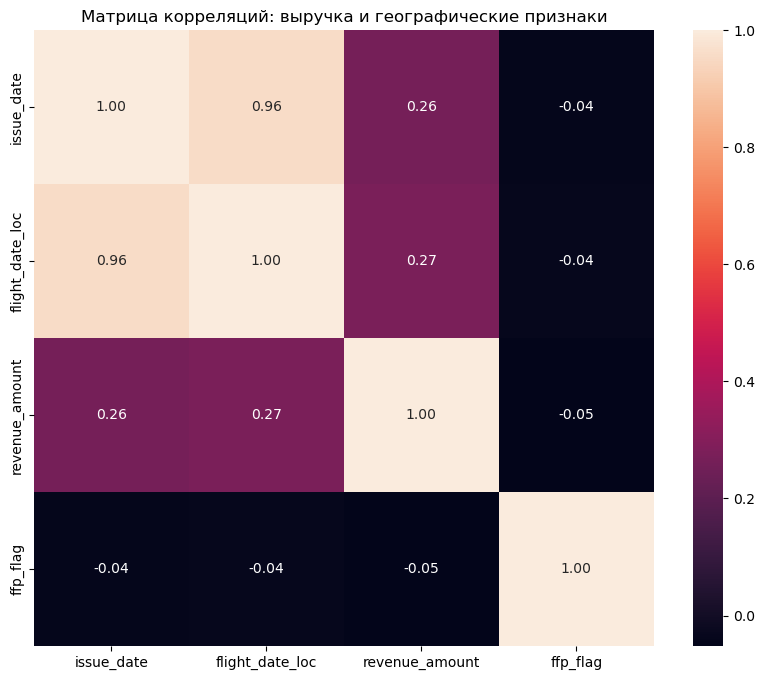

In [180]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Матрица корреляций: выручка и географические признаки')
plt.show()

#### Вывод по пункту "3.6 Определите есть ли зависимость выручки от других признаков. Постройте матрицу корреляций"
Добавив данные в одну таблицу и создав матрицу коррелций, можно сделать следующие выводы о связи выручки с географическими показателями: <br>
- **Корреляция между датой покупки билета (`issue_date`) и датой вылета (`flight_date_loc`)**: очень высокая корреляция **0.96** указывает на то, что данные переменные тесно связаны. Это может свидетельствовать о том, что большинство билетов покупается относительно близко ко дню вылета, и между датами покупки и вылета есть сильная зависимость
- **Корреляция между выручкой (`revenue_amount`) и датами:** корреляция с датой покупки билета составляет **0.26**, что указывает на слабую, но положительную зависимость. Это может означать, что более ранние или поздние покупки могут слегка влиять на выручку
- **Корреляция с датой вылета** равна **0.27**, что также свидетельствует о слабой положительной зависимости. Это может говорить о том, что выручка не сильно зависит от конкретной даты вылета, но есть небольшая связь

### Вывод по пункту "3. Исследовательский анализ данных" 
#### Вывод по пункту "3.1 Создайте отчет о динамике продаж (выручке). Постройте линейный график. Повторите отчет с детализацией по полям: FFP_FLAG, ROUTE_FLIGHT_TYPE, SALE_TYPE. Постройте общие отчеты по выручке по типам пассажиров, по типам перелета, по способам покупки, по программам лояльности. Визуализируйте каждый отчет. Решение о детализации отчетов примите самостоятельно"
***Вывод по отчету о динамике выручки по датам:***
- Выручка имеет заметные колебания с периодами роста и снижения. Скорее всего, это связано с сезонными колебаниями спроса на билеты, что характерно для авиаперевозок. Примерами могут быть рост выручки перед Новым годом (2021-11), весенние праздники и сильный рост после июня (объясняющий факт (один из): конец сессии, перелет студентов домой)

***Выводы по графикам с детализацией по полям: `FFP_FLAG`, `ROUTE_FLIGHT_TYPE`, `SALE_TYPE`, `PAX_TYPE`:*** <br>
**Динамика выручки по программе лояльности (`FFP_FLAG`):**
- Линии для участников и неучастников программы лояльности идут примерно одинаково, что может означать, что выручка распределяется равномерно между этими группами, однако видно, что выручка от учатников программы выше, чем от неучастников
<br>

**Динамика выручки по типам перелетов (`ROUTE_FLIGHT_TYPE`):**
- Внутренние перелеты (ВВЛ) и международные перелеты (МВЛ) показывают различную динамику выручки, при этом выручка от внутренних перелетов гораздо выше. Скорее всего, это связано с закрытием границ и другими событиями после 2020 года
<br>

**Динамика выручки по способам покупки (`SALE_TYPE`):**
- Способы покупки  демонстрируют различную динамику. Онлайн-продажи обычно доминируют, что говорит о большей популярности онлайн-каналов по сравнению с оффлайн-продажами
<br>

**Динамика выручки по способам покупки (`PAX_TYPE`):**
- Основная часть выручки приходится на взрослых пассажиров (AD), что логично (хаха), учитывая их доминирование в продажах. Выручка от детей (CHD) и неопределенных категорий (INF) минимальна и почти не влияет на общую картину

#### Вывод по пункту "3.2 Исследуйте выручку, примите решение об исключении выбросов для дальнейшего исследования, руководствуясь минимизацией потерь в данных" 
- При исследовании выручки были выявлены выбросы с использованием метода межквартильного размаха (IQR). Верхняя граница для выручки составила 940, нижняя граница была установлена на уровне 0
- В результате анализа было обнаружено 987 выбросов, которые составили менее 2% данных, что позволило исключить их без значительных потерь данных
- После исключения выбросов было проведено исследование распределения выручки: визуальный анализ (гистограмма и график плотности), qq-тест и статистический тест Шапиро-Уилка показали, что выручка в очищенных данных не имеет нормального распределения

#### Вывод по пункту "3.3 Исследуйте сезонность продаж. Дополнительно проверьте гипотезу о том, что выручка от продаж осенью и зимой отличается. Исследуйте выручку и число продаж по месяцам, проверьте корреляцию"
- Динамика выручки по месяцам: график показывает явные сезонные колебания выручки, с периодами подъема и спада в течение года (все то же самое, что и раньше, только без выбросов)
- Была проверена гипотеза о различии выручки осенью и зимой, выдвинуты нулевая и альтернативная гипотезы. P-значение больше 0.05, что означает, что нет значимой статистической разницы в выручке между осенью и зимой
- Провели мини-исследование числа продаж по месяцам: число продаж также варьируется по месяцам, что свидетельствует о сезонности спроса (подтверждение ранее сказанного)
- Была изучена корреляция между выручкой и числом продаж: она составляет 0.75, что указывает на сильную положительную связь — с увеличением числа продаж выручка также растет

#### Вывод по пункту "3.4 Клиенты покупают билеты в разное время. Кто-то покупает билеты заранее, другие - в последний момент. Проверьте гипотезу о том, что выручка от продажи билетов для этих двух групп клиентов отличается. Предварительно разбейте клиентов минимум на три группы"
Мы разделили пассажиров на три группы: <br>
**Первая группа (`early_booking`)**: покупают билеты сильно заранее (например, за 30 и более дней до полета)<br>
**Вторая группа (`medium_booking`)**: покупают билеты за 7–30 дней<br>
**Третья группа (`last_minute_booking`)**: покупают билеты в последний момент (за 7 и менее дней до полета) <br><br>
И с этими группами провели тесты, в которых определили, является ли разница в выручке статистически значимой <br>
**Как итог, мы отвергаем нулевыую гипотезу, раасмотрев три теста: есть статистическая значимость в разности выручки от продажи билетов. Это означает, что выручка тех, кто купил билет, например, более, чем за 30 дней, статистически значимо отличается от тех, кто купил в последние дни до отправления самолета**

#### Вывод по пункту "3.5 Определите топ-10 популярных направлений перелета (город-город) отдельно для ВМЛ и МВЛ. Изучите выручку для этих направлений. Для этого добавьте в датасет сведения о городах, используя данные из датасета"
По результатам анализа и визуализации топ-10 популярных направлений для ВМЛ и МВЛ, а также выручки по этим направлениям, было выявлено следующее: <br>
**ВМЛ (внутренние рейсы):**
- Наиболее популярные маршруты: Сочи - Москва, Москва - Сочи, а также Санкт-Петербург - Москва. Эти направления приносят высокую выручку, что связано с популярностью туристических городов
<br>
  
**МВЛ (международные рейсы):**
- Международные направления также приносят выручку, однако выручка по сравнению с внутренними рейсами их количество гораздо меньше (в несколько раз), что было уже рассмотрено и объяснено выше
<br>
<br>

Дополнительно был проведен анализ сезонности, только теперь немного иначе, и исследована средняя выручка на пассажира по разным направлениям. Результаты следующие:
<br>

**Средняя выручка на пассажира для ВМЛ:**
- Наиболее прибыльные направления по средней выручке на пассажира включают рейсы между крупными городами, такими как Самара - Мурманск
<br>

**Средняя выручка на пассажира для МВЛ:**
- Международные направления в среднем показывают более высокую среднюю выручку на пассажира, особенно по маршрутам, соединяющим крупные хабы и популярные туристические направления

#### Вывод по пункту "3.6 Определите есть ли зависимость выручки от других признаков. Постройте матрицу корреляций"
Добавив данные в одну таблицу и создав матрицу коррелций, можно сделать следующие выводы о связи выручки с географическими показателями: <br>
- **Корреляция между датой покупки билета (`issue_date`) и датой вылета (`flight_date_loc`)**: очень высокая корреляция **0.96** указывает на то, что данные переменные тесно связаны. Это может свидетельствовать о том, что большинство билетов покупается относительно близко ко дню вылета, и между датами покупки и вылета есть сильная зависимость
- **Корреляция между выручкой (`revenue_amount`) и датами:** корреляция с датой покупки билета составляет **0.26**, что указывает на слабую, но положительную зависимость. Это может означать, что более ранние или поздние покупки могут слегка влиять на выручку
- **Корреляция с датой вылета** равна **0.27**, что также свидетельствует о слабой положительной зависимости. Это может говорить о том, что выручка не сильно зависит от конкретной даты вылета, но есть небольшая связь

## Вывод по проекту
### Вывод по пункту "1. Познакомьтесь с данными"
В ходе анализа были загружены файлы, преобразован один из датасетов в нужный вид и изучена следующая информация: <br>
**Датасет `data`:**
- В датасете `data` общее количество строк - 50000
- Количество столбцов - 9
- В нескольких столбцах присутствуют пропуски, которые в дальнейшем будет необходимо обработать
- Типы данных: 8 столбцов типа object (строковые значения) и 1 столбец типа int64 (числовые данные)

 **Датасет `df_36`:**
- В датасете `df_36` общее количество строк - 7698
- Количество столбцов - 13
- В нескольких столбцах присутствуют пропуски, которые в дальнейшем будет необходимо обработать
- Типы данных: все столбцы типа object (строковые значения)

### Вывод по пункту "2. Осуществите предобработку данных"
#### Вывод по пункту "2.1 Приведите заголовки к удобному виду"
В ходе данного пункта заголовки были приведены к нужному и правильному виду:
- Убраны лишние пробелы и специальные символы до и после названия столбца
- Преобразованы все заголовки в нижний регистр
- Если в заголовках присутствовали длинные названия, мы разбили их с помощью нижних подчеркиваний для более удобного восприятия

#### Вывод по пункту "2.2 Проверьте типы данных"
Были проверены типы данных и преобразованы в нужный вид <br>
**Датасет `data`:**
- Изменили тип данных столбца `issue_date` (дата покупки) на datetime
- Изменили тип данных столбца `flight_date_loc` (дата совершения перелета) на datetime
<br>

**Датасет `df_36`:**
- Обозначили информацию, которая представлена в датасете `df_36`
- Преобразуем в тип с вещественными числами (числами с плавающей запятой) некоторые столбцы: `latitude`, `longitude`, `altitude`

#### Вывод по пункту 2.3 Обработайте пропуски
**Датасет `data`:** <br>
- Мы заполнили пропуски с городами отправления и назначения как `unknown`, т.к. нам не известно это, а удалить нельзя. А в случае с программой лояльности мы заменили на значение `no`, т.к. эти пассажиры не участвуют в программе лояльности, а уникальные значения - это либо `nan`, либо `FFP`
<br>

**Датасет `df_36`:** <br>
- Так как нам не известны город или место, где расположен аэропорт, то мы вписали значение `unknown` в место пропусков

#### Вывод по пункту "2.4 Проверьте наличие дубликатов"
- В датасетах были найдены удалены явные дубликаты. Неявных дубликатов не нашлось

#### Вывод по пункту "2.5 Исключите нулевые значения в выручке для дальнейшего исследования"
- Из датасета `data` были исключены нулевые значения в выручке для дальнейшего исследования, в результате чего количество строк в датасете после исключения нулевых значений в выручке сократилось на 466 

### Вывод по пункту "3. Исследовательский анализ данных" 
#### Вывод по пункту "3.1 Создайте отчет о динамике продаж (выручке). Постройте линейный график. Повторите отчет с детализацией по полям: FFP_FLAG, ROUTE_FLIGHT_TYPE, SALE_TYPE. Постройте общие отчеты по выручке по типам пассажиров, по типам перелета, по способам покупки, по программам лояльности. Визуализируйте каждый отчет. Решение о детализации отчетов примите самостоятельно"
***Вывод по отчету о динамике выручки по датам:***
- Выручка имеет заметные колебания с периодами роста и снижения. Скорее всего, это связано с сезонными колебаниями спроса на билеты, что характерно для авиаперевозок. Примерами могут быть рост выручки перед Новым годом (2021-11), весенние праздники и сильный рост после июня (объясняющий факт (один из): конец сессии, перелет студентов домой)

***Выводы по графикам с детализацией по полям: `FFP_FLAG`, `ROUTE_FLIGHT_TYPE`, `SALE_TYPE`, `PAX_TYPE`:*** <br>
**Динамика выручки по программе лояльности (`FFP_FLAG`):**
- Линии для участников и неучастников программы лояльности идут примерно одинаково, что может означать, что выручка распределяется равномерно между этими группами, однако видно, что выручка от учатников программы выше, чем от неучастников
<br>

**Динамика выручки по типам перелетов (`ROUTE_FLIGHT_TYPE`):**
- Внутренние перелеты (ВВЛ) и международные перелеты (МВЛ) показывают различную динамику выручки, при этом выручка от внутренних перелетов гораздо выше. Скорее всего, это связано с закрытием границ и другими событиями после 2020 года
<br>

**Динамика выручки по способам покупки (`SALE_TYPE`):**
- Способы покупки  демонстрируют различную динамику. Онлайн-продажи обычно доминируют, что говорит о большей популярности онлайн-каналов по сравнению с оффлайн-продажами
<br>

**Динамика выручки по способам покупки (`PAX_TYPE`):**
- Основная часть выручки приходится на взрослых пассажиров (AD), что логично (хаха), учитывая их доминирование в продажах. Выручка от детей (CHD) и неопределенных категорий (INF) минимальна и почти не влияет на общую картину

#### Вывод по пункту "3.2 Исследуйте выручку, примите решение об исключении выбросов для дальнейшего исследования, руководствуясь минимизацией потерь в данных" 
- При исследовании выручки были выявлены выбросы с использованием метода межквартильного размаха (IQR). Верхняя граница для выручки составила 940, нижняя граница была установлена на уровне 0
- В результате анализа было обнаружено 987 выбросов, которые составили менее 2% данных, что позволило исключить их без значительных потерь данных
- После исключения выбросов было проведено исследование распределения выручки: визуальный анализ (гистограмма и график плотности), qq-тест и статистический тест Шапиро-Уилка показали, что выручка в очищенных данных не имеет нормального распределения

#### Вывод по пункту "3.3 Исследуйте сезонность продаж. Дополнительно проверьте гипотезу о том, что выручка от продаж осенью и зимой отличается. Исследуйте выручку и число продаж по месяцам, проверьте корреляцию"
- Динамика выручки по месяцам: график показывает явные сезонные колебания выручки, с периодами подъема и спада в течение года (все то же самое, что и раньше, только без выбросов)
- Была проверена гипотеза о различии выручки осенью и зимой, выдвинуты нулевая и альтернативная гипотезы. P-значение больше 0.05, что означает, что нет значимой статистической разницы в выручке между осенью и зимой
- Провели мини-исследование числа продаж по месяцам: число продаж также варьируется по месяцам, что свидетельствует о сезонности спроса (подтверждение ранее сказанного)
- Была изучена корреляция между выручкой и числом продаж: она составляет 0.75, что указывает на сильную положительную связь — с увеличением числа продаж выручка также растет

#### Вывод по пункту "3.4 Клиенты покупают билеты в разное время. Кто-то покупает билеты заранее, другие - в последний момент. Проверьте гипотезу о том, что выручка от продажи билетов для этих двух групп клиентов отличается. Предварительно разбейте клиентов минимум на три группы"
Мы разделили пассажиров на три группы: <br>
**Первая группа (`early_booking`)**: покупают билеты сильно заранее (например, за 30 и более дней до полета)<br>
**Вторая группа (`medium_booking`)**: покупают билеты за 7–30 дней<br>
**Третья группа (`last_minute_booking`)**: покупают билеты в последний момент (за 7 и менее дней до полета) <br><br>
И с этими группами провели тесты, в которых определили, является ли разница в выручке статистически значимой <br>
**Как итог, мы отвергаем нулевыую гипотезу, раасмотрев три теста: есть статистическая значимость в разности выручки от продажи билетов. Это означает, что выручка тех, кто купил билет, например, более, чем за 30 дней, статистически значимо отличается от тех, кто купил в последние дни до отправления самолета**

#### Вывод по пункту "3.5 Определите топ-10 популярных направлений перелета (город-город) отдельно для ВМЛ и МВЛ. Изучите выручку для этих направлений. Для этого добавьте в датасет сведения о городах, используя данные из датасета"
По результатам анализа и визуализации топ-10 популярных направлений для ВМЛ и МВЛ, а также выручки по этим направлениям, было выявлено следующее: <br>
**ВМЛ (внутренние рейсы):**
- Наиболее популярные маршруты: Сочи - Москва, Москва - Сочи, а также Санкт-Петербург - Москва. Эти направления приносят высокую выручку, что связано с популярностью туристических городов
<br>
  
**МВЛ (международные рейсы):**
- Международные направления также приносят выручку, однако выручка по сравнению с внутренними рейсами их количество гораздо меньше (в несколько раз), что было уже рассмотрено и объяснено выше
<br>
<br>

Дополнительно был проведен анализ сезонности, только теперь немного иначе, и исследована средняя выручка на пассажира по разным направлениям. Результаты следующие:
<br>

**Средняя выручка на пассажира для ВМЛ:**
- Наиболее прибыльные направления по средней выручке на пассажира включают рейсы между крупными городами, такими как Самара - Мурманск
<br>

**Средняя выручка на пассажира для МВЛ:**
- Международные направления в среднем показывают более высокую среднюю выручку на пассажира, особенно по маршрутам, соединяющим крупные хабы и популярные туристические направления

#### Вывод по пункту "3.6 Определите есть ли зависимость выручки от других признаков. Постройте матрицу корреляций"
Добавив данные в одну таблицу и создав матрицу коррелций, можно сделать следующие выводы о связи выручки с географическими показателями: <br>
- **Корреляция между датой покупки билета (`issue_date`) и датой вылета (`flight_date_loc`)**: очень высокая корреляция **0.96** указывает на то, что данные переменные тесно связаны. Это может свидетельствовать о том, что большинство билетов покупается относительно близко ко дню вылета, и между датами покупки и вылета есть сильная зависимость
- **Корреляция между выручкой (`revenue_amount`) и датами:** корреляция с датой покупки билета составляет **0.26**, что указывает на слабую, но положительную зависимость. Это может означать, что более ранние или поздние покупки могут слегка влиять на выручку
- **Корреляция с датой вылета** равна **0.27**, что также свидетельствует о слабой положительной зависимости. Это может говорить о том, что выручка не сильно зависит от конкретной даты вылета, но есть небольшая связь